In [1]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [2]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text[5]

['promotion',
 'arbeitsbedingungen',
 'wissenschaftliche aktivitäten',
 'weiterbildung',
 'auslandsaufenthalt']

In [6]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [7]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [8]:
keywords_within_text[5]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [9]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [10]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [11]:
data['Ground_Truth'][0]

"'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'"

In [12]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [14]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [15]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [16]:
data["clean_text"][11]

'Waren oder sind Sie seit der letzten Befragung im in irgendeiner Form erwerbstätig . Bitte geben Sie mit Hilfe der Zeilennummern an bei welcher Stelle es sich um Ihre aktuelle Stelle handelt . Handelt es sich bei Ihrer letzten beruflichen Station um dieselbe Stelle die Sie zum Zeitpunkt der letzten Befragung im ausgeübt haben . Handelte es sich bei Ihrer letzten Stelle um eine Tätigkeit in der Wissenschaft . Welcher der folgenden Personalkategorien konnten Sie sich zuordnen . Waren Sie zuletzt im öffentlichen Dienst bzw . einem dem öffentlichen Dienst tariflich angeglichenen Arbeitsverhältnis beschäftigt . Wie viele Mitarbeiter innen waren bei Ihrem Arbeitgeber beschäftigt . Welchem Wirtschaftsbereich gehörte der Betrieb bzw . die Einrichtung in dem der Sie arbeiteten schwerpunktmäßig an . Haben Sie zuletzt in einer Position gearbeitet in der ... Haben Sie zuletzt in einer Position gearbeitet in der ... Wie viel Euro pro Jahr erhielten Sie darüber hinaus jährlich in Form von Zulagen .

In [17]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=True))

In [18]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [19]:

data["Clean_Text_Sentences"] = new_clean_text

In [20]:
len(data["Clean_Text_Sentences"][8])

151

In [21]:
Preprocesed_text = []
for i in range(len(data["Clean_Text_Sentences"])):
    Preprocesed_text.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        Preprocesed_text[i].append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["Clean_Text_Sentences"][i][j])) 

In [22]:
Preprocesed_text[10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten. Ich habe. Ich habe das Niveau. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten. Ich habe die Gesamtnote. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Was machen Sie zurzeit genau. Ich studiere in einem Studiengang an einer Hochschule oder Universität. Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang. DSH TestDaF. Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg. Ich warte auf meinen Prüfungstermin

In [23]:
cleaned_text = []
for i in range(len(Preprocesed_text)):
    cleaned_text.append([])
    for j in range(len(Preprocesed_text[i])):
        for line in Preprocesed_text[i][j].split('\n'):
            # Replace multiple dots with space
            line = re.sub('\. \.+', '.', line) 
            # Remove single dots
            cleaned_text[i].append(re.sub('\.', '.', line))

In [24]:
len(cleaned_text[5])

154

In [25]:
#using spacy model for POS tagging
nlp = spacy.load('de_core_news_lg')
Extracted_Pos_tags=[]  # can change it to Extracted_Noun
for i in range(len(cleaned_text)):
    Extracted_Pos_tags.append([])
    for j in range(len(cleaned_text[i])):
        Extracted_Pos_tags[i].append([])
        doc = nlp(cleaned_text[i][j])
        for t in doc:
            tag=t.pos_
            if t.text not in Extracted_Pos_tags[i][j]:
                Extracted_Pos_tags[i][j].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [26]:
lemmatizer = GermaLemma()
lemmatized_words = []
nlp = spacy.load('de_core_news_lg')

for i in range(len(Extracted_Pos_tags)):
    lemmatized_words.append([])
    for j in range(len(Extracted_Pos_tags[i])):
        lemmatized_words[i].append([])
        lemma_spacy = nlp(cleaned_text[i][j])
        for l in range(len(lemma_spacy)):
            token = lemma_spacy[l]
            if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
                lemmatized_words[i][j].append(token.lemma_)
            else:
                lemmatized_words[i][j].append(lemmatizer.find_lemma(Extracted_Pos_tags[i][j][l][0], Extracted_Pos_tags[i][j][l][1]))

In [27]:
lemmatized_words[0][0]

['der',
 'Hochschule',
 'an',
 'der',
 'ich',
 'im',
 'Dezember',
 'zur',
 'Promotion',
 'registrieren',
 'sein',
 'haben',
 'ebenfalls',
 'Interesse',
 'daran',
 'mehr',
 'über',
 'der',
 'Promotionsbedingung',
 'sich',
 'Promovierenden',
 'zu',
 'erfahren',
 '.']

In [28]:
lemma_sentences = []
for i in range(len(lemmatized_words)):
    lemma_sentences.append([])
    for j in range(len(lemmatized_words[i])):
        lemma_sentences[i].append(' '.join(lemmatized_words[i][j]))

In [29]:
lemma_sentences[10]

['welch Ergebnis haben ich bei der Sprachprüfung für der Hochschulzugang DSH TestDaF oder anderer Prüfung erhalten . Ich haben . Ich haben der Niveau . Ich habe der Prüfung bestehen aber wissen der Ergebnis nicht mehr . Ich habe der Prüfung nicht bestehen aber wissen der Ergebnis nicht mehr . Ich habe noch kein Prüfungsergebnis erhalten .',
 'welch Ergebnis haben ich bei der Feststellungsprüfung für der Hochschulzugang erhalten . Ich haben der Gesamtnote . Ich habe der Prüfung bestehen aber wissen der Ergebnis nicht mehr . Ich habe der Prüfung nicht bestehen aber wissen der Ergebnis nicht mehr . Ich habe noch kein Prüfungsergebnis erhalten .',
 'Was machen ich zurzeit genau . Ich studieren in einer Studiengang an einer Hochschule oder Universität . Ich besuchen ein weit Kurs zur Vorbereitung auf einen Sprachprüfung für der Hochschulzugang . DSH TestDaF. Ich besuchen ein weit Schwerpunktkurs zur Vorbereitung auf einen Feststellungsprüfung an einer Studienkolleg . Ich warten auf mein Prü

In [30]:
data["Lemma_Text_Sentences"] = lemma_sentences

In [31]:
data["Lemma_Text_Sentences"]

0     [der Hochschule an der ich im Dezember zur Pro...
1     [wie sein dies studienvorbereitend Kurs verlau...
2     [welch Studienabschluss haben ich in mein letz...
3     [an welch Art Hochschule studieren ich ., welc...
4     [wie werden ich mein derzeitig Tätigkeit bzw.,...
5     [Ware oder sein ich seit der letzter Befragung...
6     [wie zufried sein ich mit mein bisherig Bildun...
7     [In welch Sprache mögen ich der Befragung durc...
8     [Ware oder sein ich seit der letzter Befragung...
9     [welch Abschluss streben ich in mein derzeitig...
10    [welch Ergebnis haben ich bei der Sprachprüfun...
11    [Ware oder sein ich seit der letzter Befragung...
12    [befinden ich sich aktuell in einer Urlaubssem...
13    [Haben ich ein Ausbildungsberuf erlernen . Ind...
14    [Ware ich seit mein Studienabschluss der ich e...
15    [Haben ich einen Promotion beginnen oder absch...
16    [Werden ich im Sommersemester nach der BAföG f...
17    [Haben ich noch in einer weit Wohnung lebe

In [32]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(data["Lemma_Text_Sentences"])):
    for j in range(len(data["Lemma_Text_Sentences"][i])):
        tokens = nltk.word_tokenize(data["Lemma_Text_Sentences"][i][j]) #without nltk.word_tokenize, it gives character level DF
        for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
 

In [33]:
DF

{'der': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Hochschule': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18},
 'an': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'ich': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'im': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Dezember': {0, 6},
 'zur': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Promotion': {0, 2, 4, 5, 7, 8, 11, 13, 15},
 'registrieren': {0, 9},
 'sein': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'haben': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'ebenfalls': {0},
 'Interesse': {0, 1, 2, 3, 5, 6, 12, 14, 16, 17},
 'daran': {0, 3, 9, 12, 16},
 'mehr': {0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 14, 15, 16, 17, 18},
 'über': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17},
 'Promotionsbedingung': {0},
 'sich': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

In [34]:
for word,freq in DF.items():
    print(word,len(freq))

der 19
Hochschule 18
an 19
ich 19
im 19
Dezember 2
zur 18
Promotion 9
registrieren 2
sein 19
haben 19
ebenfalls 1
Interesse 10
daran 5
mehr 15
über 16
Promotionsbedingung 1
sich 19
Promovierenden 2
zu 19
erfahren 5
. 19
Anfang 2
offiziell 4
als 19
Doktorand 1
in 19
handeln 12
um 17
einen 19
gemeldet 1
Unterbrechung 2
Können 3
noch 16
erinnern 1
welch 19
Quartal 1
mit 19
Arbeit 11
beginnen 15
zulassen 1
werden 19
mein 19
darüb 10
informieren 3
dass 17
abbrechen 7
Promotionsverfahren 1
Ausland 13
beteiligen 5
dabei 9
ein 19
gemeinsam 8
Abschluss 16
aus 19
In 19
und 19
cotutelle 1
de 2
thèse 1
Fachhochschule 7
bzw 16
Ware 15
letzter 17
Jahr 13
Universität 9
Saarlandes 1
UdS 1
wissenschaftlich 17
Beschäftigter 1
tätig 12
wie 19
attraktiv 4
bewerten 11
Arbeitgeberin 1
Wurden 4
Sicht 5
Einsparung 1
vornehmen 1
Veränderung 5
führen 10
dies 18
Strukturentscheidung 1
treffen 18
Führten 1
Bereich 7
Fach 9
Teil 5
Forschungsprojekt 3
auch 16
anderer 19
Person 7
arbeiten 15
geben 16
außer 2
selbst 

folgendermaßen 1
Karriereentwicklung 1
auswirken 2
Förderung 7
Transferable 1
Skills 2
Basic 1
Module 1
Teaching 1
Professional 1
Science 3
meets 1
Market 1
EPE 1
Mentoring 3
Plus 1
Aus 7
unterbrechen 7
vergangen 4
verpflichtend 1
Gesamtlaufzeit 2
Arbeitgeber 6
derselbe 6
Stunde 9
Woche 13
Durchschnitt 5
Semesterwochenstunde 1
lehren 1
Land 8
normal 2
wer 3
Umfang 7
körperlich 2
zählen 2
Krankheit 6
Verletzung 2
seelisch 2
Befinden 2
Depression 2
Stimmung 3
ganz 10
Tag 5
vier 3
Ausübung 2
alltäglich 2
Aktivität 9
Versorgung 2
Erholung 2
Pflege 5
sozial 7
beeinträchtigen 5
anerkennen 3
Grad 3
heute 3
Abschlussnote 3
bitten 10
Angabe 10
Studienabschluss 9
Sie 1
berechtigen 4
Blick 5
Fortgang 1
bestreben 1
stets 1
weiter 7
Studium 18
Christian 1
Albrecht 1
Struktur 6
zusätzlich 10
studienvorbereitend 2
Dieser 1
beenden 7
besuchen 9
zurzeit 12
weiterhin 2
Sprachprüfung 2
Hochschulzugang 2
DSH 2
TestDAF 1
Feststellungsprüfung 2
Studienkollegs 1
vorzeitig 1
TestDaF 2
Prüfung 5
Niveau 11
best

Prüfungsvorbereitung 2
Prüfungsarbeit 1
fachwissenschaftlich 1
Abfassen 1
referaten 1
Lern 3
Arbeitsschwierigkeit 1
Betreuungs 2
Beratungsmöglichkeit 1
informell 3
beratungs 1
Studieneinführung 1
Orientierungsveranstaltung 1
per 3
Mail 3
Zentrale 1
Fachschaft 1
Auslandsamt 1
International 1
Office 1
Studienganges 1
Weise 3
räumlich 8
sächlich 1
Ausstattung 9
erreicht 3
Studienertrag 1
fördern 5
Weiterlernen 1
fachübergreifend 1
Interdisziplinarität 2
Teamfähigkeit 1
Planungs 2
Organisationsfähigkeit 2
Allgemeinbildung 2
breit 3
Autonomie 1
analysieren 1
Kritikfähigkeit 1
kritisch 2
Denken 4
Verantwortungsbewusstsein 1
Maßnahme 3
Studienerfolg 1
erhöhen 2
bestanden 1
Verpflichtung 1
Mitte 1
Erweiterung 1
Arbeitsgruppe 3
Verringerung 1
neben 6
zügig 1
Prüfungsverfahren 1
Begutachtung 2
frühzeitig 1
Leistungsüberprüfung 1
Studienjahr 1
Kommilitone 2
Leistungsanforderung 2
schriftlich 6
Ausarbeitungen 1
abzufassen 1
Beteiligung 7
Vielfalt 2
Fachinhalt 2
Orientierung 2
Planung 2
Voraus 1
Re

Nachwuchswissenschaftlerinnen 1
wettbewerbsfähig 1
besetzend 1
Qualifikationsprofilen 1
promoviert 1
NachwuchswissenschaftlerInnen 1
Bewerber 1
Aufstellung 1
Liste 2
Berufungsverfahren 1
bibliometrisch 1
Kennzahl 1
Zitationen 1
Index 1
Bekanntschaft 1
Bewerberin 1
Kandidat 1
außerwissenschaftlich 1
strategisch 1
Vernetzung 1
Kandidatin 1
Community 1
Probevortrag 1
Sichtbarkeit 1
Projektgruppe 1
Wissenschaftlerin 1
WissenschaftlerInnen 1
Kollegin 1
schützen 1
Patenten 1
Erste 1
rein 1
Forschenden 1
Gewinn 1
Vorteil 1
ziehen 2
Hypothese 1
Betracht 1
solche 2
widersprechen 1
widmen 2
vornehmlich 1
Verbreitung 1
Innovation 3
Qualitätskriterium 1
anhand 1
zeigen 1
Opferbereitschaft 1
Lehrstuhls 1
Fachgesellschaft 2
rhetorisch 1
Lehrtätigkeit 1
Forschungstätigkeit 1
Hochschulverwaltung 2
Verwirklichung 1
Inwieweit 3
bearbeitet 1
Weiterentwicklung 1
Methodenkenntnis 1
erfinden 1
klären 2
Chef 1
Chefin 1
geistig 2
herausfordern 1
mitwirken 1
anleiten 2
Öfter 1
Lohn 1
Gehaltserhöhung 1
gesicher

Tausch 1
Kongressen 1
Forschungsaufenthalt 1
fixieren 1
abgeben 1
Disputation 1
Rigorosum 1
zeitaufwändig 1
Gemeinschaft 1
Leitungsfunktion 1
Neugierde 1
befriedigen 1
Erhöhung 1
Geschäftspartner 1
entstehen 1
gelass 1
entgegen 1
zweifeln 1
Anforderungsvielfalt 1
hoh 1
Gestaltungsspielraum 1
Zeitdruck 1
Mobilitätsanforderung 1
Arbeitszeitautonomie 1
Wettbewerbsdruck 1
Angestellter 1
unentschloss 1
Betreuungsperson 1
Administration 1
Verwaltung 1
kongress 1
Projektbericht 1
grau 1
früher 1
Ausbildungsbetrieb 1
Ausbildungsstätte 1
Geldbetrag 1
Haushaltsbeitrag 1
erheben 1
Müssen 1
zahlen 1
Hochschulort 1
Trägerschaft 1
Studentenwohnheim 1
Sommer 1
Winter 1
Muter 1
Großvater 1
Großmutter 1
Bevölkerungsgruppe 1
Schultyp 1
Nach 1
Klasse 1
Mahlzeit 1
Mo 1
Tageshauptmahlzeit 1
Zuzug 1
Spätaussiedler 1
Einbürgerung 1
Deutschen 1
Staat 1
Spätaussiedlerin 1
gestalten 1
insbesondere 1
Unterrichtsfach 1
StudVerl 1
StudMerk 1
Weiterförderung 1
Präsenzstudiengang 1
Kindheit 1
Nettostundenlohn 1
Nach

In [35]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [36]:
df_list.sort(key=lambda x:x[1])

In [37]:
df_list

[('ebenfalls', 0.05263157894736842),
 ('Promotionsbedingung', 0.05263157894736842),
 ('Doktorand', 0.05263157894736842),
 ('gemeldet', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('zulassen', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('Saarlandes', 0.05263157894736842),
 ('UdS', 0.05263157894736842),
 ('Beschäftigter', 0.05263157894736842),
 ('Arbeitgeberin', 0.05263157894736842),
 ('Einsparung', 0.05263157894736842),
 ('vornehmen', 0.05263157894736842),
 ('Strukturentscheidung', 0.05263157894736842),
 ('Führten', 0.05263157894736842),
 ('Graduiertenakademie', 0.05263157894736842),
 ('HHU', 0.05263157894736842),
 ('Düsseldorf', 0.05263157894736842),
 ('Promotionsprogramm', 0.05263157894736842),
 ('Entstand', 0.05263157894736842),
 ('beantworten', 0.05263157894736842),
 ('Promotions', 0.05263157894736842),
 ('Betreuungsstatus', 0.05263157894

In [38]:
word_counts = [x[1] for x in df_list]

In [39]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [40]:
df_analysis

,index,0
0,0.052632,2068
1,0.105263,615
2,0.157895,312
3,0.210526,199
4,0.263158,145
5,0.315789,116
6,0.368421,88
7,0.421053,55
8,0.473684,40
9,0.526316,49


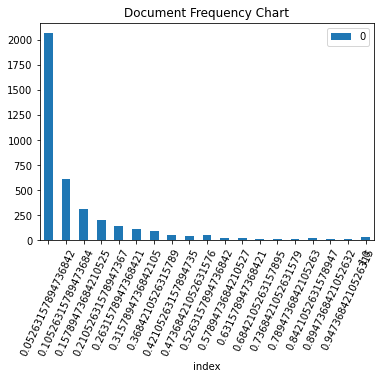

In [41]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [42]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [43]:
data['Ground_Truth']

0     'wissenschaftssystem', 'betreuung', 'wissensch...
1     'integration', 'geflüchtete', 'studienkolleg',...
2     'beruflicher verbleib von exmatrikulierten', '...
3     'evaluation', 'qualifikation', 'effizienz', 's...
4                                  'hochschulforschung'
5     'promotion', 'hochschulforschung', 'promotion'...
6            'studienberechtigte', 'hochschulforschung'
7                                  'hochschulforschung'
8     'promotion', 'hochschulforschung', 'promotion'...
9                                  'hochschulforschung'
10    'integration', 'geflüchtete', 'studienkolleg',...
11    'promotion', 'hochschulforschung', 'promotion'...
12    'internationale studierende', 'digitale lehre'...
13    'promotion', 'hochschulforschung', 'promotions...
14                  'absolventen', 'hochschulforschung'
15                                 'hochschulforschung'
16                                 'hochschulforschung'
17                                 'hochschulfor

In [44]:
Pos_tags=[]
for i in range(len(data['Ground_Truth'])):
    Pos_tags.append([])
    sw = nlp(data['Ground_Truth'][i])
    for t in sw:
        tag=t.pos
        if t.text not in Pos_tags:
            Pos_tags[i].append((t.text, t.pos_))

In [45]:
Pos_tags

[[("'", 'PUNCT'),
  ('wissenschaftssystem', 'ADJ'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('betreuung', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('wissenschaftliche', 'ADJ'),
  ('karriere', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsformen', 'VERB'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsmotive', 'ADJ'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('vereinbarkeit', 'NOUN'),
  ('von', 'ADP'),
  ('familie', 'NOUN'),
  ('und', 'CCONJ'),
  ('beruf', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('monetäre', 'ADJ'),
  ('erträge', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('nicht-monetäre', 'ADJ'),
  ('erträge', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('wissenschaftlicher', 'ADJ'),
  ('nachwuchs', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsabbruch', 'ADV'),
  ("'", 'PUNCT'),
 

In [46]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [47]:
# Extracted_Pos_tags
# 9 pair of adjective and noun, where adjetive is followed by noun and there one pair where verb is followed by noun.

In [48]:
# from collections import Counter
# word_counts = []
# for i in range(len(Extracted_Pos_tags)):
#     word_counts.append(Counter(Extracted_Pos_tags[i]))

In [49]:
#using the keybert library
from keybert import KeyBERT

In [50]:
kw_model = KeyBERT("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")  #("clips/mfaq") #("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli") 
#clips/mfaq

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)

In [52]:
#The default pattern is <J.*>*<N.*>+ which means that it extract keyphrases 
#that have 0 or more adjectives followed by 1 or more nouns.

# only extract a noun: pos_pattern='<N.*>'

In [53]:
# from keyphrase_vectorizers import KeyphraseCountVectorizer
# # Init default vectorizer.
# vectorizer = KeyphraseCountVectorizer(spacy_pipeline='de_core_news_lg')

In [54]:
# Print parameters
print(vectorizer.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': ['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', '

In [55]:
# After initializing the vectorizer, it can be fitted
# to learn the keyphrases from the text documents.
for i in range(len(data["Lemma_Text_Sentences"])):
    vectorizer.fit(data["Lemma_Text_Sentences"][i])

/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ernst', 'ordnung', 'schluss'] not in stop_words.
  % sorted(inconsistent)


In [56]:
for i in range(len(cleaned_text)):
    vectorizer.fit(cleaned_text[i])

In [57]:
# After learning the keyphrases, they can be returned.
keywords = []  # keyphrases = []
keywords.append(vectorizer.get_feature_names_out())

In [58]:
keywords

[array(['abendessen', 'abgeschlossen', 'abschluss', 'abschlusses',
        'adresse', 'aktuell', 'aktueller', 'alkohol', 'alt', 'anerkennung',
        'angebote', 'angemessen', 'angespart', 'angestrebter',
        'angewiesen', 'arbeits', 'art', 'attraktivere', 'aufgeführten',
        'aufwand', 'ausbildung', 'ausbildungsförderung', 'ausgaben',
        'ausgezahlt', 'ausland', 'auslandsaufenthalt',
        'auslandsaufenthalts', 'ausländischen', 'ausreichende', 'aussagen',
        'auto', 'bafög', 'bank', 'bankdarlehen', 'bankengruppe', 'bar',
        'beantragt', 'beginn', 'begonnen', 'beherrschen', 'behinderung',
        'beiträge', 'bekannten', 'bekommen', 'beratungs', 'beruf',
        'berufsausbildung', 'beschäftigung', 'bessere', 'bestreitung',
        'betarungs', 'betrag', 'betreuung', 'bevorzugten', 'bezahlen',
        'bezahlung', 'bildungskredit', 'bundesverwaltungsamt', 'cafeteria',
        'cafeterien', 'chemikalien', 'chronischer', 'depressive',
        'deutsches', 'deut

In [59]:
new_set_keywords = []
for i in range(len(cleaned_text)):
    new_set_keywords.append(kw_model.extract_keywords(cleaned_text[i], vectorizer=vectorizer,stop_words=stop_words, top_n=15, use_mmr=True, diversity=0.9))
    

/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
503it [00:00, 839.76it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
114it [00:00, 720.98it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory

In [60]:
new_set_keywords[1]

[[('besuche', 0.0298),
  ('weiterhin', 0.0502),
  ('beendet', 0.0776),
  ('testdaf', 0.0793),
  ('zurzeit', 0.1105),
  ('hochschulzugang', 0.1399),
  ('teilgenommen', 0.1528),
  ('abgebrochen', 0.1586),
  ('verlaufen', 0.1675),
  ('vorzeitig', 0.1898),
  ('studienkollegs', 0.1957),
  ('feststellungsprüfung', 0.2439),
  ('kurs', 0.3121),
  ('sprachprüfung', 0.3535),
  ('studienvorbereitende', 0.3817)],
 [('erhalten', 0.0645),
  ('bestanden', 0.0897),
  ('weiß', 0.1179),
  ('testdaf', 0.1527),
  ('niveau', 0.1755),
  ('ergebnis', 0.212),
  ('hochschulzugang', 0.221),
  ('prüfung', 0.4215),
  ('sprachprüfung', 0.4339),
  ('prüfungsergebnis', 0.4996)],
 [('weiß', 0.0975),
  ('erhalten', 0.1214),
  ('bestanden', 0.1386),
  ('gesamtnote', 0.1448),
  ('hochschulzugang', 0.1963),
  ('feststellungsprüfung', 0.3184),
  ('ergebnis', 0.3655),
  ('prüfung', 0.4137),
  ('prüfungsergebnis', 0.5813)],
 [('testdaf', 0.0566),
  ('zurzeit', 0.0642),
  ('besuche', 0.0699),
  ('telc', 0.1076),
  ('besuchen

In [61]:
#flattening the list
flatten_list= []
for i in range(len(new_set_keywords)):
    flatten_list.append([item for sublist in new_set_keywords[i] for item in sublist])

In [62]:
#to remove None Found - for keyphrase vectorizer
for i in range(len(flatten_list)):
    for elm in list(flatten_list[i]):
        if type(elm)!= tuple:
            flatten_list[i].remove(elm)

In [63]:
flatten_list[0]

[('ebenfalls', 0.0382),
 ('dezember', 0.0808),
 ('registriert', 0.0865),
 ('interesse', 0.1381),
 ('erfahren', 0.1653),
 ('promotionsbedingungen', 0.2389),
 ('promotion', 0.2472),
 ('promovierenden', 0.3277),
 ('hochschule', 0.3446),
 ('anfang', 0.0344),
 ('registriert', 0.1162),
 ('offiziell', 0.1421),
 ('dezember', 0.1759),
 ('hochschule', 0.1938),
 ('doktorand', 0.2738),
 ('offiziell', 0.2244),
 ('handelt', 0.2561),
 ('unterbrechung', 0.314),
 ('hochschule', 0.3264),
 ('gemeldete', 0.3882),
 ('quartal', 0.0876),
 ('begonnen', 0.124),
 ('arbeiten', 0.1243),
 ('erinnern', 0.1761),
 ('zugelassen', 0.014),
 ('quartal', 0.1477),
 ('erinnern', 0.3113),
 ('promotion', 0.0605),
 ('informiert', 0.1391),
 ('hochschule', 0.2032),
 ('abgebrochen', 0.2326),
 ('erinnern', 0.1506),
 ('quartal', 0.1553),
 ('abgebrochen', 0.1755),
 ('promotion', 0.1928),
 ('beteiligt', 0.0964),
 ('promotionsverfahren', 0.1023),
 ('hochschule', 0.2805),
 ('ausland', 0.3007),
 ('ausland', 0.044),
 ('de', 0.1039),
 ('a

In [64]:
# #to check the keyphrases
# keyphrases_set = []
# for i in range(len(flatten_list)):
#     if len(flatten_list[i][0].split(" "))> 1:
#         keyphrases_set.append(flatten_list[i])

In [65]:
def avg(second_tuple_element):
    return sum(second_tuple_element)/len(second_tuple_element)

result = []
for i in range(len(flatten_list)):
    result.append([(n, avg([v[1] for v in flatten_list[i] if v[0] == n])) for n in set([n[0] for n in flatten_list[i]])])

In [66]:
#sorted in descending order
updated_unique_keyword = []
for i in range(len(result)):
    updated_unique_keyword.append(sorted(result[i],key=lambda x: x[1], reverse= True))

In [67]:
updated_unique_keyword[5]

[('tätigkeitsbereich', 0.9674),
 ('entwicklungsprojekten', 0.8963),
 ('weiterbildungsmöglichkeiten', 0.8793),
 ('arbeitsmitteln', 0.7728),
 ('privatleben', 0.7693),
 ('arbeitsaufgaben', 0.7287),
 ('fachhochschule', 0.6969),
 ('wirtschaftsbereich', 0.6714),
 ('personalkategorien', 0.6292),
 ('erfahrungen', 0.6224),
 ('publikationen', 0.6068666666666668),
 ('stiftungsprofessur', 0.6002),
 ('arbeitsverhältnis', 0.5965),
 ('forschungsförderung', 0.5929),
 ('partnerschaft', 0.592),
 ('kongresse', 0.5892),
 ('gastprofessur', 0.5868),
 ('fachliteratur', 0.586),
 ('mitarbeiter', 0.5719),
 ('konferenzen', 0.5649),
 ('promotionsthema', 0.5557),
 ('entwicklungsrelevanten', 0.5498),
 ('wissenschaftlicher', 0.5445),
 ('monatliche', 0.5412),
 ('honorarprofessur', 0.5193),
 ('deutschland', 0.51425),
 ('techniken', 0.5134),
 ('fachzeitschriften', 0.5055799999999999),
 ('konzeption', 0.4986),
 ('wissenschaft', 0.49586666666666673),
 ('kreativität', 0.4905),
 ('vertretungsprofessur', 0.4903),
 ('methode

In [68]:
keywords_evaluation = [updated_unique_keyword[0:300] for updated_unique_keyword in updated_unique_keyword]

In [69]:
keywords_evaluation[0]

[('gesellschaftspolitischen', 0.9105),
 ('zurückhaltend', 0.886),
 ('verwaltungstätigkeiten', 0.8742),
 ('experimenten', 0.8641),
 ('arbeitstitel', 0.8496),
 ('forschungsdaten', 0.8487),
 ('konfliktfällen', 0.8423),
 ('aufstiegsmöglichkeiten', 0.818),
 ('kommunikativ', 0.8039),
 ('examensarbeiten', 0.7581),
 ('workshops', 0.74),
 ('engagiert', 0.7374),
 ('forschungsinfrastruktur', 0.7274),
 ('gesundheitliche', 0.7257),
 ('startup', 0.7231),
 ('gesprächig', 0.72),
 ('basic', 0.7139),
 ('faul', 0.7049),
 ('teaching', 0.7044),
 ('promotions', 0.7),
 ('manchmal', 0.6974),
 ('publikationen', 0.6952499999999999),
 ('inspiriert', 0.6866),
 ('professor', 0.682),
 ('fachzeitschriften', 0.6647),
 ('arbeitsbelastung', 0.6593),
 ('forschungsideen', 0.6566),
 ('fremdsprachenkenntnisse', 0.649),
 ('sonstiges', 0.6461),
 ('verschriftlichen', 0.6415),
 ('fachhochschule', 0.6405),
 ('konzeption', 0.631),
 ('freiberufler', 0.6271),
 ('zeitplan', 0.627),
 ('erhebungsdesigns', 0.6201),
 ('forschungsprojek

In [70]:
new_filtered_keywords = []
new_filtered_keyphrases = []
for i in range(len(updated_unique_keyword)):
    new_filtered_keywords.append([])
    new_filtered_keyphrases.append([])
    for elem in updated_unique_keyword[i]:
        if len(elem[0].split()) ==1:
            new_filtered_keywords[i].append(elem)
        else:
            new_filtered_keyphrases[i].append(elem)

In [71]:
new_filtered_keywords[0]

[('gesellschaftspolitischen', 0.9105),
 ('zurückhaltend', 0.886),
 ('verwaltungstätigkeiten', 0.8742),
 ('experimenten', 0.8641),
 ('arbeitstitel', 0.8496),
 ('forschungsdaten', 0.8487),
 ('konfliktfällen', 0.8423),
 ('aufstiegsmöglichkeiten', 0.818),
 ('kommunikativ', 0.8039),
 ('examensarbeiten', 0.7581),
 ('workshops', 0.74),
 ('engagiert', 0.7374),
 ('forschungsinfrastruktur', 0.7274),
 ('gesundheitliche', 0.7257),
 ('startup', 0.7231),
 ('gesprächig', 0.72),
 ('basic', 0.7139),
 ('faul', 0.7049),
 ('teaching', 0.7044),
 ('promotions', 0.7),
 ('manchmal', 0.6974),
 ('publikationen', 0.6952499999999999),
 ('inspiriert', 0.6866),
 ('professor', 0.682),
 ('fachzeitschriften', 0.6647),
 ('arbeitsbelastung', 0.6593),
 ('forschungsideen', 0.6566),
 ('fremdsprachenkenntnisse', 0.649),
 ('sonstiges', 0.6461),
 ('verschriftlichen', 0.6415),
 ('fachhochschule', 0.6405),
 ('konzeption', 0.631),
 ('freiberufler', 0.6271),
 ('zeitplan', 0.627),
 ('erhebungsdesigns', 0.6201),
 ('forschungsprojek

In [72]:
new_filtered_keyphrases[0]

[]

In [73]:
keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [74]:
len(keywords_keyphrases[0])

300

In [75]:
check = list(data['Ground_Truth'])

In [76]:
check

["'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'",
 "'integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'",
 "'beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'",
 "'evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'",
 "'hochschulforschung'",
 "'promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbe

In [77]:
test_gt = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'],
       ['evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['studienberechtigte', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['hochschulforschung'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'], 
       ['internationale studierende', 'digitale lehre', 'wohnsituation', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'studierende mit kind', 'persönlichkeit', 'beeinträchtigt studierende', 'studiensituation', 'studierende', 'corona', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['absolventen', 'hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung']]

In [78]:
len(test_gt)

19

In [79]:
keywords_set = []
for i in range(len(test_gt)):
    keywords_set.append([])
    for j in range(len(test_gt[i])):
        if len(test_gt[i][j].split(" ")) == 1:
            keywords_set[i].append(test_gt[i][j])

In [80]:
keywords_set

[['wissenschaftssystem',
  'betreuung',
  'promotionsformen',
  'promotionsmotive',
  'promotionsabbruch',
  'promovierende',
  'promotion',
  'persönlichkeit',
  'finanzierung',
  'mobilität',
  'gesundheit',
  'erwerbsverläufe',
  'promovierte'],
 ['integration',
  'geflüchtete',
  'studienkolleg',
  'migration',
  'studienvorbereitung'],
 ['studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'],
 ['evaluation',
  'qualifikation',
  'effizienz',
  'studiensituation',
  'zeitreihen',
  'studierendenbefragung',
  'hochschulforschung'],
 ['hochschulforschung'],
 ['promotion',
  'hochschulforschung',
  'promotion',
  'promotionsbedingungen',
  'promotionsbetreuung',
  'promotionsfinanzierung',
  'bildungsverlauf',
  'berufsverlauf',
  'beschäftigungsbedingungen',
  'weiterqualifikation',
  'karriereziele',
  'auslandsaufenthalt',
  'soziodemographie',
  'gesundheit',
  'persönlichkeit'],
 ['studienberechtigte', 'hochschulforschung'],
 ['hochschulforschung'],
 ['promotio

In [81]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(updated_unique_keyword)):  
    predicted.append([])           #used for nested list
    for j in range(1,int(len(updated_unique_keyword[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in updated_unique_keyword[i]])[0:j*chunk_size])

In [82]:
len(predicted[0])

850

In [83]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keywords_set):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keywords_set)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [84]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], keywords_within_text[i]))

In [85]:
eval_values[0]

[(0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0

In [86]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [87]:
len(precison_values[0])

850

In [88]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [89]:
recall_values[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Graph for document 0


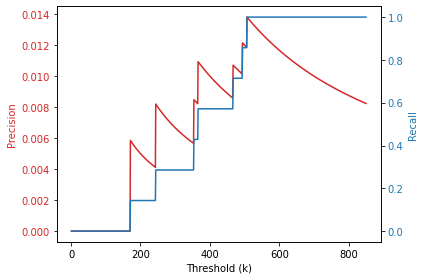

Graph for document 1


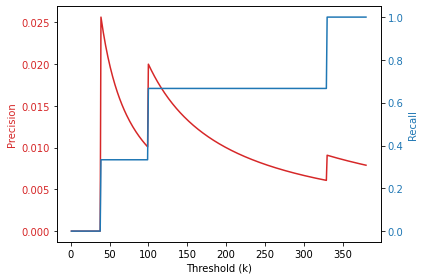

Graph for document 2


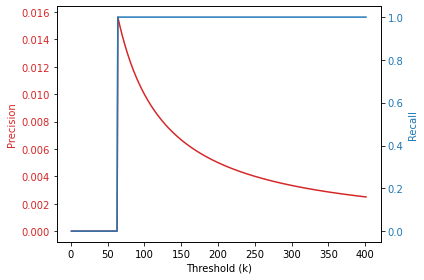

Graph for document 3


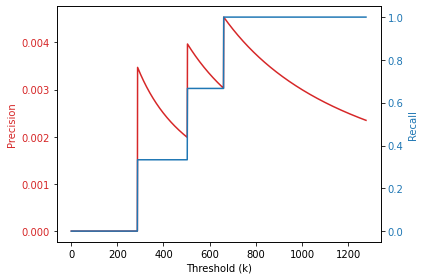

Graph for document 4


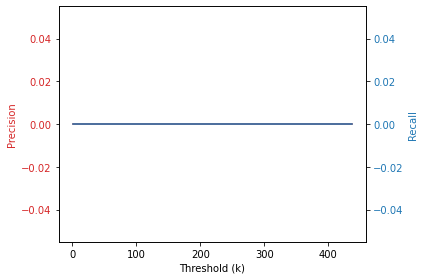

Graph for document 5


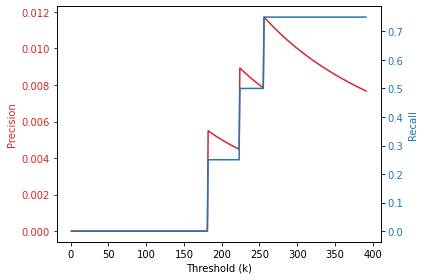

Graph for document 6


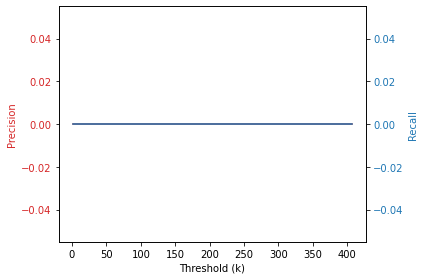

Graph for document 7


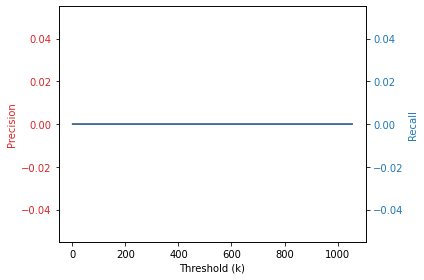

Graph for document 8


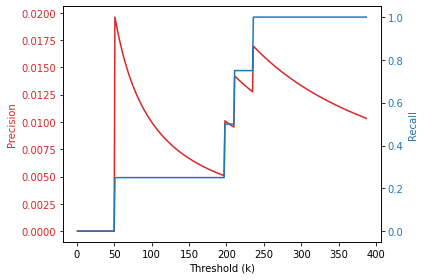

Graph for document 9


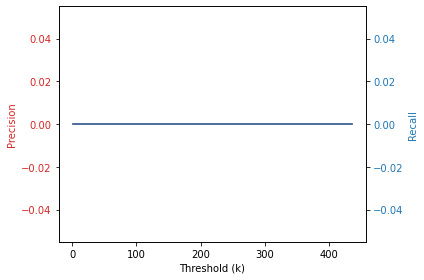

Graph for document 10


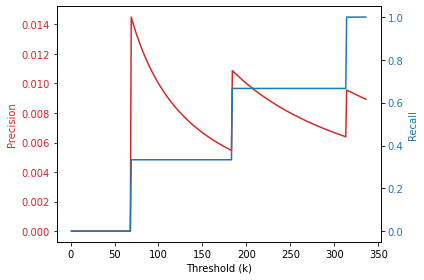

Graph for document 11


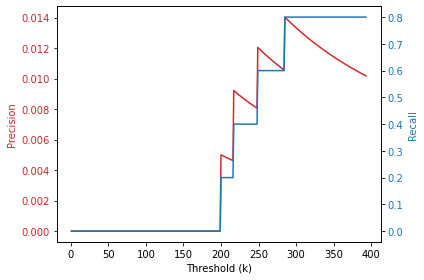

Graph for document 12


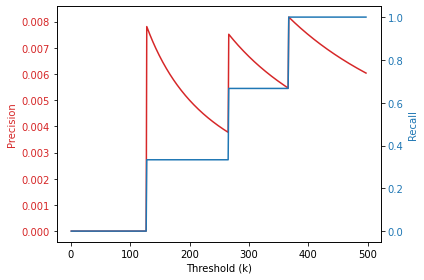

Graph for document 13


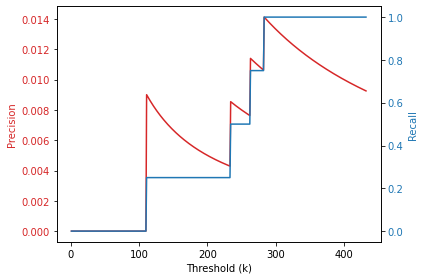

Graph for document 14


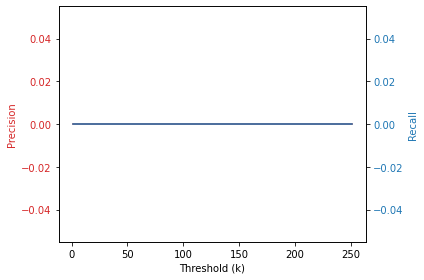

Graph for document 15


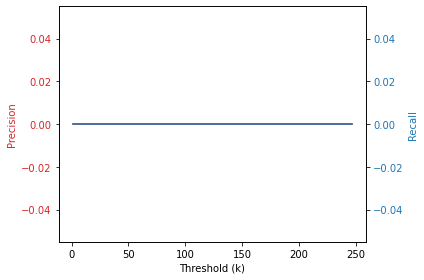

Graph for document 16


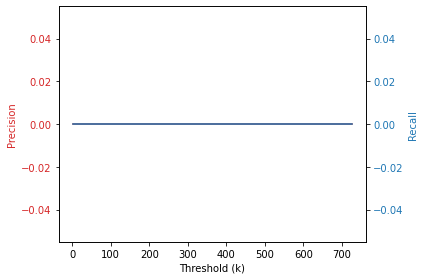

Graph for document 17


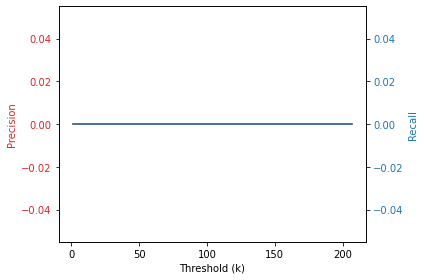

Graph for document 18


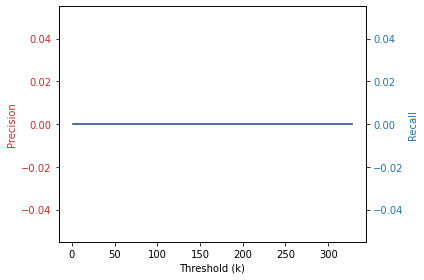

In [90]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [91]:
updated_unique_keyword[5]

[('tätigkeitsbereich', 0.9674),
 ('entwicklungsprojekten', 0.8963),
 ('weiterbildungsmöglichkeiten', 0.8793),
 ('arbeitsmitteln', 0.7728),
 ('privatleben', 0.7693),
 ('arbeitsaufgaben', 0.7287),
 ('fachhochschule', 0.6969),
 ('wirtschaftsbereich', 0.6714),
 ('personalkategorien', 0.6292),
 ('erfahrungen', 0.6224),
 ('publikationen', 0.6068666666666668),
 ('stiftungsprofessur', 0.6002),
 ('arbeitsverhältnis', 0.5965),
 ('forschungsförderung', 0.5929),
 ('partnerschaft', 0.592),
 ('kongresse', 0.5892),
 ('gastprofessur', 0.5868),
 ('fachliteratur', 0.586),
 ('mitarbeiter', 0.5719),
 ('konferenzen', 0.5649),
 ('promotionsthema', 0.5557),
 ('entwicklungsrelevanten', 0.5498),
 ('wissenschaftlicher', 0.5445),
 ('monatliche', 0.5412),
 ('honorarprofessur', 0.5193),
 ('deutschland', 0.51425),
 ('techniken', 0.5134),
 ('fachzeitschriften', 0.5055799999999999),
 ('konzeption', 0.4986),
 ('wissenschaft', 0.49586666666666673),
 ('kreativität', 0.4905),
 ('vertretungsprofessur', 0.4903),
 ('methode

In [92]:
check_new = [elem[0] for elem in updated_unique_keyword[8]]
len(check_new)

387

In [93]:
keywords_within_text[8]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [94]:
list(set(check_new).intersection(keywords_within_text[8]))

['weiterbildung', 'promotion', 'auslandsaufenthalt', 'arbeitsbedingungen']

In [95]:
check_new.index('promotion') 

197

In [96]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [97]:
best_recall_indices

[506, 329, 63, 660, 0, 255, 0, 0, 235, 0, 313, 284, 366, 282, 0, 0, 0, 0, 0]

In [98]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [99]:
best_recall_indices_element

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.75,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Re-Ranking


In [100]:
words = []
for i in range(len(updated_unique_keyword)):
    words.append([])
    for j in range(len(updated_unique_keyword[i])):
        words[i].append(updated_unique_keyword[i][j][0])

In [101]:
words[0]

['gesellschaftspolitischen',
 'zurückhaltend',
 'verwaltungstätigkeiten',
 'experimenten',
 'arbeitstitel',
 'forschungsdaten',
 'konfliktfällen',
 'aufstiegsmöglichkeiten',
 'kommunikativ',
 'examensarbeiten',
 'workshops',
 'engagiert',
 'forschungsinfrastruktur',
 'gesundheitliche',
 'startup',
 'gesprächig',
 'basic',
 'faul',
 'teaching',
 'promotions',
 'manchmal',
 'publikationen',
 'inspiriert',
 'professor',
 'fachzeitschriften',
 'arbeitsbelastung',
 'forschungsideen',
 'fremdsprachenkenntnisse',
 'sonstiges',
 'verschriftlichen',
 'fachhochschule',
 'konzeption',
 'freiberufler',
 'zeitplan',
 'erhebungsdesigns',
 'forschungsprojekts',
 'analysieren',
 'intellektuelle',
 'entwickeln',
 'fachtexte',
 'nervös',
 'wissenschaftler',
 'wissenschaftsbereich',
 'postdocstelle',
 'gespräche',
 'künstlerische',
 'betreuungsstatus',
 'skills',
 'zwischenergebnissen',
 'abschlusses',
 'gesundheitszustand',
 'manuskripten',
 'professionals',
 'philgrad',
 'arbeitssituation',
 'arbeitsve

In [102]:
import pickle
with open('/home/pawan/KeyBert/Thesaurus_lists/thesoz_thesauri.pkl', 'rb') as f:
    newlist_thesaurus = pickle.load(f)

In [103]:
newlist_thesaurus

['APEC',
 'Kirchenaustritt',
 'Kompetenzbewertung ',
 'Sterbetafel ',
 'Massengesellschaft',
 'Leichtlohngruppe',
 'Hilfsarbeiter ',
 'EGB ',
 'psychische Behinderung ',
 'Ausbildungsträger ',
 'Organisationsstruktur',
 'ALLBUS',
 'protestantische Soziallehre',
 'Deutschlandfrage',
 'Nationalfeiertag ',
 'Grenznutzen',
 ' Ernährung',
 'Geldwirtschaft',
 ' englische Sprache',
 'Staatshaushalt ',
 'Manipulation',
 'Schwarzmarkt',
 'Rundfunkjournalismus ',
 'Rheinbund',
 'Luft- und Raumfahrtindustrie ',
 'Verkehrserschließung',
 ' Hausbesetzung',
 'Einkommensdisparität ',
 'Wirtschaftsunternehmen ',
 'Kommunalentwicklung ',
 ' Überstunden',
 'Parteienfinanzierung ',
 'Körperbehinderter ',
 ' Strafentlassung',
 'formale Logik',
 'Verschwendung',
 'Ontogenese',
 'Gentechnologie',
 'Standort',
 'Sonntagsarbeit ',
 'Makler',
 'Arbeiterselbstverwaltung',
 ' Rechtsgrundlage',
 ' politischer Prozess',
 ' Nordkorea',
 'Gentrifizierung',
 'Sombart, Werner',
 'Gewinn- und Verlustrechnung',
 'Wirtsc

In [104]:
#lowercase thesaurus words
new_thesaurus_list = []
for item in newlist_thesaurus:
    new_thesaurus_list.append(item.lower())

In [105]:
new_thesaurus_list

['apec',
 'kirchenaustritt',
 'kompetenzbewertung ',
 'sterbetafel ',
 'massengesellschaft',
 'leichtlohngruppe',
 'hilfsarbeiter ',
 'egb ',
 'psychische behinderung ',
 'ausbildungsträger ',
 'organisationsstruktur',
 'allbus',
 'protestantische soziallehre',
 'deutschlandfrage',
 'nationalfeiertag ',
 'grenznutzen',
 ' ernährung',
 'geldwirtschaft',
 ' englische sprache',
 'staatshaushalt ',
 'manipulation',
 'schwarzmarkt',
 'rundfunkjournalismus ',
 'rheinbund',
 'luft- und raumfahrtindustrie ',
 'verkehrserschließung',
 ' hausbesetzung',
 'einkommensdisparität ',
 'wirtschaftsunternehmen ',
 'kommunalentwicklung ',
 ' überstunden',
 'parteienfinanzierung ',
 'körperbehinderter ',
 ' strafentlassung',
 'formale logik',
 'verschwendung',
 'ontogenese',
 'gentechnologie',
 'standort',
 'sonntagsarbeit ',
 'makler',
 'arbeiterselbstverwaltung',
 ' rechtsgrundlage',
 ' politischer prozess',
 ' nordkorea',
 'gentrifizierung',
 'sombart, werner',
 'gewinn- und verlustrechnung',
 'wirtsc

In [106]:
# optimization.
for i in range(len(new_thesaurus_list)):
    stripped_new_thesaurus_list = [s.strip() for s in new_thesaurus_list]

In [107]:
stripped_new_thesaurus_list

['apec',
 'kirchenaustritt',
 'kompetenzbewertung',
 'sterbetafel',
 'massengesellschaft',
 'leichtlohngruppe',
 'hilfsarbeiter',
 'egb',
 'psychische behinderung',
 'ausbildungsträger',
 'organisationsstruktur',
 'allbus',
 'protestantische soziallehre',
 'deutschlandfrage',
 'nationalfeiertag',
 'grenznutzen',
 'ernährung',
 'geldwirtschaft',
 'englische sprache',
 'staatshaushalt',
 'manipulation',
 'schwarzmarkt',
 'rundfunkjournalismus',
 'rheinbund',
 'luft- und raumfahrtindustrie',
 'verkehrserschließung',
 'hausbesetzung',
 'einkommensdisparität',
 'wirtschaftsunternehmen',
 'kommunalentwicklung',
 'überstunden',
 'parteienfinanzierung',
 'körperbehinderter',
 'strafentlassung',
 'formale logik',
 'verschwendung',
 'ontogenese',
 'gentechnologie',
 'standort',
 'sonntagsarbeit',
 'makler',
 'arbeiterselbstverwaltung',
 'rechtsgrundlage',
 'politischer prozess',
 'nordkorea',
 'gentrifizierung',
 'sombart, werner',
 'gewinn- und verlustrechnung',
 'wirtschaftsdemokratie',
 'regi

In [108]:
import pickle
with open('Similarity_thesaurus_and_keybert_keywords/similarity_thesaurus_THESOZ.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [109]:
mynewlist[0]

[(11323, tensor(0.8928)),
 (358, tensor(0.9013)),
 (13806, tensor(0.6538)),
 (5919, tensor(0.7243)),
 (7961, tensor(0.7595)),
 (2062, tensor(0.6231)),
 (14423, tensor(0.8979)),
 (5177, tensor(1.0000)),
 (1531, tensor(1.0000)),
 (4140, tensor(0.8941)),
 (2677, tensor(0.7611)),
 (10336, tensor(0.8893)),
 (1531, tensor(0.8843)),
 (11686, tensor(0.9057)),
 (12976, tensor(0.9057)),
 (12439, tensor(0.7876)),
 (5123, tensor(0.7708)),
 (1396, tensor(0.7132)),
 (8778, tensor(1.0000)),
 (3573, tensor(0.6425)),
 (2463, tensor(0.6884)),
 (11637, tensor(1.0000)),
 (13755, tensor(0.9283)),
 (5876, tensor(1.0000)),
 (5790, tensor(1.0000)),
 (10905, tensor(0.7462)),
 (14601, tensor(0.8920)),
 (10685, tensor(1.)),
 (1615, tensor(1.0000)),
 (9101, tensor(0.7454)),
 (13266, tensor(0.8939)),
 (11961, tensor(0.8507)),
 (10000, tensor(1.0000)),
 (5143, tensor(1.0000)),
 (1760, tensor(0.7250)),
 (9737, tensor(0.5517)),
 (1052, tensor(0.7173)),
 (7351, tensor(0.8453)),
 (3928, tensor(0.9419)),
 (9076, tensor(

### Mapped keywords with their similairty values

In [110]:
mapped_keywords = []
for i in range(len(mynewlist)):
    mapped_keywords.append([])
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = mynewlist[i][j][1]
        mapped_keywords[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [111]:
mapped_keywords[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(0.8928)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(0.9013)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(0.6538)),
 ('experimenten', 'leiharbeit', tensor(0.7243)),
 ('arbeitstitel', 'prüfungswesen', tensor(0.7595)),
 ('forschungsdaten', 'persistenz', tensor(0.6231)),
 ('konfliktfällen', 'konfliktsituation', tensor(0.8979)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.0000)),
 ('kommunikativ', 'gespräch', tensor(1.0000)),
 ('examensarbeiten', 'kommunikation', tensor(0.8941)),
 ('workshops', 'kreativität', tensor(0.7611)),
 ('engagiert', 'gesundheitsleistung', tensor(0.8893)),
 ('forschungsinfrastruktur', 'gespräch', tensor(0.8843)),
 ('gesundheitliche', 'unterricht', tensor(0.9057)),
 ('startup', 'forschungsgegenstand', tensor(0.9057)),
 ('gesprächig', 'vorurteil', tensor(0.7876)),
 ('basic', 'entrepreneurship', tensor(0.7708)),
 ('faul', 'grundwert', tensor(0.7132)),
 ('teaching', 'arbeitsbelastung', tensor(1.0

In [112]:
sorted_mapped_keywords = []
for i in range(len(mapped_keywords)):
    sorted_mapped_keywords.append(sorted(mapped_keywords[i], key=lambda tup: tup[2], reverse=True))

In [113]:
sorted_mapped_keywords[3]

[('berufswunsch', 'europapolitik', tensor(1.0000)),
 ('hochschulgruppen', 'geschlecht', tensor(1.0000)),
 ('tageszeitung', 'vorlesung', tensor(1.0000)),
 ('lehre', 'aussage', tensor(1.0000)),
 ('diskussionen', 'studienplanung', tensor(1.0000)),
 ('dienst', 'forschungsprojekt', tensor(1.0000)),
 ('weiterlernen', 'konzentration', tensor(1.0000)),
 ('fähigkeit', 'entscheidung', tensor(1.0000)),
 ('politisch', 'staatsangehörigkeit', tensor(1.0000)),
 ('beschäftigung', 'förderung', tensor(1.0000)),
 ('evaluation', 'kultur', tensor(1.0000)),
 ('orientierung', 'standort', tensor(1.0000)),
 ('privatwirtschaft', 'privatwirtschaft', tensor(1.0000)),
 ('studentenvereinigungen', 'kritikfähigkeit', tensor(1.0000)),
 ('sportgruppen', 'wissenschaft', tensor(1.0000)),
 ('öffentliches', 'studieninhalt', tensor(1.0000)),
 ('überregionale', 'hochschulabschluss', tensor(1.0000)),
 ('weiterstudieren', 'praxis', tensor(1.0000)),
 ('freizeit', 'studienfach', tensor(1.0000)),
 ('gegebenenfalls', 'fachwissen',

In [183]:
sorted_mapped_keywords[0]

[('semesterwochenstunden', 'geschlecht', tensor(1.0000)),
 ('versorgung', 'aussage', tensor(1.0000)),
 ('sonstiges', 'forschungsprojekt', tensor(1.0000)),
 ('forschungsprojekt', 'förderung', tensor(1.0000)),
 ('steigern', 'mitgliedschaft', tensor(1.0000)),
 ('bezahlt', 'arbeitsteilung', tensor(1.0000)),
 ('vorrangig', 'staatsangehörigkeit', tensor(1.0000)),
 ('erhalten', 'zukunft', tensor(1.0000)),
 ('arbeitszeit', 'fachwissen', tensor(1.0000)),
 ('erfahrungen', 'wissenschaft', tensor(1.0000)),
 ('verletzungen', 'lebenssituation', tensor(1.0000)),
 ('projekt', 'team', tensor(1.0000)),
 ('promotionsbedingt', 'praxis', tensor(1.0000)),
 ('kinder', 'haushalt', tensor(1.0000)),
 ('wissenschaftssystem', 'fest', tensor(1.0000)),
 ('kommunikativ', 'gespräch', tensor(1.0000)),
 ('nervös', 'fachhochschule', tensor(1.0000)),
 ('schreiben', 'arbeitssituation', tensor(1.0000)),
 ('beruflich', 'unternehmen', tensor(1.0000)),
 ('verbessern', 'zufriedenheit', tensor(1.0000)),
 ('forschungsthema', 've

**Baseline**  - Adding keybert relevance score and the cosine similarities values(between keybert keywords and theasurus keywords)

In [115]:
mapped_keywords_baseline = []
for i in range(len(mynewlist)):
    mapped_keywords_baseline.append([])
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = mynewlist[i][j][1]+ updated_unique_keyword[i][j][1]
        mapped_keywords_baseline[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [116]:
mapped_keywords_baseline[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.8033)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.7873)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(1.5280)),
 ('experimenten', 'leiharbeit', tensor(1.5884)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.6091)),
 ('forschungsdaten', 'persistenz', tensor(1.4718)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.7402)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.8180)),
 ('kommunikativ', 'gespräch', tensor(1.8039)),
 ('examensarbeiten', 'kommunikation', tensor(1.6522)),
 ('workshops', 'kreativität', tensor(1.5011)),
 ('engagiert', 'gesundheitsleistung', tensor(1.6267)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.6117)),
 ('gesundheitliche', 'unterricht', tensor(1.6314)),
 ('startup', 'forschungsgegenstand', tensor(1.6288)),
 ('gesprächig', 'vorurteil', tensor(1.5076)),
 ('basic', 'entrepreneurship', tensor(1.4847)),
 ('faul', 'grundwert', tensor(1.4181)),
 ('teaching', 'arbeitsbelastung', tensor(1.7

In [117]:
sorted_mapped_keywords_baseline = []
for i in range(len(mapped_keywords_baseline)):
    sorted_mapped_keywords_baseline.append(sorted(mapped_keywords_baseline[i], key=lambda tup: tup[2], reverse=True))

In [118]:
sorted_mapped_keywords_baseline[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(1.8180)),
 ('kommunikativ', 'gespräch', tensor(1.8039)),
 ('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.8033)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.7873)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.7402)),
 ('teaching', 'arbeitsbelastung', tensor(1.7044)),
 ('publikationen', 'professor', tensor(1.6952)),
 ('professor', 'karriereplanung', tensor(1.6820)),
 ('fachzeitschriften', 'spiel', tensor(1.6647)),
 ('examensarbeiten', 'kommunikation', tensor(1.6522)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.6490)),
 ('sonstiges', 'forschungsprojekt', tensor(1.6461)),
 ('gesundheitliche', 'unterricht', tensor(1.6314)),
 ('startup', 'forschungsgegenstand', tensor(1.6288)),
 ('freiberufler', 'freiraum', tensor(1.6271)),
 ('zeitplan', 'fachzeitschrift', tensor(1.6270)),
 ('engagiert', 'gesundheitsleistung', tensor(1.6267)),
 ('inspiriert', 'künstler', tensor(1.6149)),
 ('forschungsinfrastruktur', 'gespräch

# Scenario 1:
__Case 1__:  Change thesaurus, Keybert will be as it is.
considering standard deviation

giving more importance to thesaurus


In [119]:
Case_1 = []
for i in range(len(mynewlist)):
    Case_1.append([])
    x = 1 + np.std(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (x *mynewlist[i][j][1])+ updated_unique_keyword[i][j][1]
        Case_1[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [120]:
Case_1[2]

[('familientätigkeit', 'familie-beruf', tensor(2.0007)),
 ('wissenschaftliche', 'berufsweg', tensor(1.7122)),
 ('zurückhaltend', 'unterrichtseinheit', tensor(1.7852)),
 ('übergangsjob', 'fachwissen', tensor(1.9864)),
 ('wissenschaftliches', 'persistenz', tensor(1.5593)),
 ('fachwissen', 'auslandsstudium', tensor(1.8392)),
 ('masterstudiengängen', 'gefahrstoff', tensor(1.7591)),
 ('berufswunsch', 'kommunikation', tensor(1.8346)),
 ('kommunikativ', 'bachelor', tensor(1.7692)),
 ('stofffülle', 'anforderungsprofil', tensor(1.7546)),
 ('auslandspraktika', 'berufswunsch', tensor(1.9126)),
 ('konzepte', 'gespräch', tensor(1.7544)),
 ('bachelorabschluss', 'konzept', tensor(1.8700)),
 ('arbeitsaufgaben', 'magisterprüfung', tensor(1.6054)),
 ('gesprächig', 'vorurteil', tensor(1.6047)),
 ('masterabschluss', 'beschäftigungsdauer', tensor(1.6558)),
 ('faul', 'künstler', tensor(1.7476)),
 ('wissbegierig', 'ausfallzeit', tensor(1.4255)),
 ('manchmal', 'arbeitsteilung', tensor(1.7238)),
 ('bearbeitung

In [121]:
sorted_Case_1 = []
for i in range(len(Case_1)):
    sorted_Case_1.append(sorted(Case_1[i], key=lambda tup: tup[2], reverse=True))

In [122]:
sorted_Case_1[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(1.9447)),
 ('kommunikativ', 'gespräch', tensor(1.9306)),
 ('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.9165)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.9015)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.8540)),
 ('teaching', 'arbeitsbelastung', tensor(1.8311)),
 ('publikationen', 'professor', tensor(1.8220)),
 ('professor', 'karriereplanung', tensor(1.8087)),
 ('fachzeitschriften', 'spiel', tensor(1.7914)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.7757)),
 ('sonstiges', 'forschungsprojekt', tensor(1.7728)),
 ('examensarbeiten', 'kommunikation', tensor(1.7655)),
 ('freiberufler', 'freiraum', tensor(1.7538)),
 ('zeitplan', 'fachzeitschrift', tensor(1.7537)),
 ('gesundheitliche', 'unterricht', tensor(1.7462)),
 ('startup', 'forschungsgegenstand', tensor(1.7435)),
 ('engagiert', 'gesundheitsleistung', tensor(1.7394)),
 ('inspiriert', 'künstler', tensor(1.7326)),
 ('forschungsinfrastruktur', 'gespräch

# Scenario 1:
__Case 2__:  Change thesaurus, Keybert will be as it is.
considering average

giving more importance to keybert

In [123]:
Case_2 = []
for i in range(len(mynewlist)):
    Case_2.append([])
    x = np.mean(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (x *mynewlist[i][j][1])+ updated_unique_keyword[i][j][1]
        Case_2[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [124]:
Case_2[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.6440)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.6265)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(1.4113)),
 ('experimenten', 'leiharbeit', tensor(1.4591)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.4736)),
 ('forschungsdaten', 'persistenz', tensor(1.3606)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.5800)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.6396)),
 ('kommunikativ', 'gespräch', tensor(1.6255)),
 ('examensarbeiten', 'kommunikation', tensor(1.4927)),
 ('workshops', 'kreativität', tensor(1.3653)),
 ('engagiert', 'gesundheitsleistung', tensor(1.4680)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.4539)),
 ('gesundheitliche', 'unterricht', tensor(1.4698)),
 ('startup', 'forschungsgegenstand', tensor(1.4672)),
 ('gesprächig', 'vorurteil', tensor(1.3671)),
 ('basic', 'entrepreneurship', tensor(1.3471)),
 ('faul', 'grundwert', tensor(1.2909)),
 ('teaching', 'arbeitsbelastung', tensor(1.5

In [125]:
sorted_Case_2 = []
for i in range(len(Case_2)):
    sorted_Case_2.append(sorted(Case_2[i], key=lambda tup: tup[2], reverse=True))

In [126]:
sorted_Case_2[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.6440)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.6396)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.6265)),
 ('kommunikativ', 'gespräch', tensor(1.6255)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.5800)),
 ('teaching', 'arbeitsbelastung', tensor(1.5260)),
 ('publikationen', 'professor', tensor(1.5168)),
 ('professor', 'karriereplanung', tensor(1.5036)),
 ('examensarbeiten', 'kommunikation', tensor(1.4927)),
 ('fachzeitschriften', 'spiel', tensor(1.4863)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.4736)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.4706)),
 ('gesundheitliche', 'unterricht', tensor(1.4698)),
 ('engagiert', 'gesundheitsleistung', tensor(1.4680)),
 ('sonstiges', 'forschungsprojekt', tensor(1.4677)),
 ('startup', 'forschungsgegenstand', tensor(1.4672)),
 ('experimenten', 'leiharbeit', tensor(1.4591)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.4539)),
 ('inspiriert', 'küns

# Scenario 2:
__Case 1__:  thesaurus constant , Keybert will change.

giving more importance to keybert.


In [127]:
Case_1_new = []
for i in range(len(mynewlist)):
    Case_1_new.append([])
    x = 1 + np.std(list(tup[1] for tup in updated_unique_keyword[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (mynewlist[i][j][1])+ (x*updated_unique_keyword[i][j][1])
        Case_1_new[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [128]:
Case_1_new[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.9839)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.9630)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(1.7014)),
 ('experimenten', 'leiharbeit', tensor(1.7597)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.7776)),
 ('forschungsdaten', 'persistenz', tensor(1.6401)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.9072)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.9802)),
 ('kommunikativ', 'gespräch', tensor(1.9633)),
 ('examensarbeiten', 'kommunikation', tensor(1.8026)),
 ('workshops', 'kreativität', tensor(1.6478)),
 ('engagiert', 'gesundheitsleistung', tensor(1.7730)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.7560)),
 ('gesundheitliche', 'unterricht', tensor(1.7753)),
 ('startup', 'forschungsgegenstand', tensor(1.7722)),
 ('gesprächig', 'vorurteil', tensor(1.6504)),
 ('basic', 'entrepreneurship', tensor(1.6263)),
 ('faul', 'grundwert', tensor(1.5579)),
 ('teaching', 'arbeitsbelastung', tensor(1.8

In [129]:
sorted_Case_1_new = []
for i in range(len(Case_1_new)):
    sorted_Case_1_new.append(sorted(Case_1_new[i], key=lambda tup: tup[2], reverse=True))

In [130]:
sorted_Case_1_new[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.9839)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.9802)),
 ('kommunikativ', 'gespräch', tensor(1.9633)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.9630)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.9072)),
 ('teaching', 'arbeitsbelastung', tensor(1.8441)),
 ('publikationen', 'professor', tensor(1.8331)),
 ('professor', 'karriereplanung', tensor(1.8173)),
 ('examensarbeiten', 'kommunikation', tensor(1.8026)),
 ('fachzeitschriften', 'spiel', tensor(1.7965)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.7777)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.7776)),
 ('gesundheitliche', 'unterricht', tensor(1.7753)),
 ('sonstiges', 'forschungsprojekt', tensor(1.7742)),
 ('engagiert', 'gesundheitsleistung', tensor(1.7730)),
 ('startup', 'forschungsgegenstand', tensor(1.7722)),
 ('experimenten', 'leiharbeit', tensor(1.7597)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.7560)),
 ('freiberufler', 'fr

# Scenario 2:
__Case 2__:  thesaurus constant , Keybert will change.

giving more importance to thesaurus.

In [131]:
Case_2_new = []
for i in range(len(mynewlist)):
    Case_2_new.append([])
    x = np.mean(list(tup[1] for tup in updated_unique_keyword[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (mynewlist[i][j][1])+ (x*updated_unique_keyword[i][j][1])
        Case_2_new[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [132]:
Case_2_new[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.1033)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.1061)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(0.8559)),
 ('experimenten', 'leiharbeit', tensor(0.9240)),
 ('arbeitstitel', 'prüfungswesen', tensor(0.9559)),
 ('forschungsdaten', 'persistenz', tensor(0.8193)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.0926)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.1891)),
 ('kommunikativ', 'gespräch', tensor(1.1858)),
 ('examensarbeiten', 'kommunikation', tensor(1.0694)),
 ('workshops', 'kreativität', tensor(0.9321)),
 ('engagiert', 'gesundheitsleistung', tensor(1.0598)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.0525)),
 ('gesundheitliche', 'unterricht', tensor(1.0735)),
 ('startup', 'forschungsgegenstand', tensor(1.0728)),
 ('gesprächig', 'vorurteil', tensor(0.9541)),
 ('basic', 'entrepreneurship', tensor(0.9358)),
 ('faul', 'grundwert', tensor(0.8762)),
 ('teaching', 'arbeitsbelastung', tensor(1.1

In [133]:
sorted_Case_2_new = []
for i in range(len(Case_2_new)):
    sorted_Case_2_new.append(sorted(Case_2_new[i], key=lambda tup: tup[2], reverse=True))

In [134]:
sorted_Case_2_new[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(1.1891)),
 ('kommunikativ', 'gespräch', tensor(1.1858)),
 ('teaching', 'arbeitsbelastung', tensor(1.1628)),
 ('publikationen', 'professor', tensor(1.1607)),
 ('professor', 'karriereplanung', tensor(1.1577)),
 ('fachzeitschriften', 'spiel', tensor(1.1537)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.1500)),
 ('sonstiges', 'forschungsprojekt', tensor(1.1494)),
 ('freiberufler', 'freiraum', tensor(1.1450)),
 ('zeitplan', 'fachzeitschrift', tensor(1.1450)),
 ('nervös', 'fachhochschule', tensor(1.1357)),
 ('gespräche', 'wissenschaftler', tensor(1.1335)),
 ('betreuungsstatus', 'rolle', tensor(1.1325)),
 ('zwischenergebnissen', 'beschäftigungsverhältnis', tensor(1.1319)),
 ('arbeitsvertrag', 'zusammenarbeit', tensor(1.1288)),
 ('forschungsprojekt', 'förderung', tensor(1.1286)),
 ('karriereplanung', 'arbeitszeit', tensor(1.1284)),
 ('schreiben', 'arbeitssituation', tensor(1.1281)),
 ('selbstständigkeit', 'stipendium', tensor(1.1243)),
 

# Scenario 3:
thesaurus change , Keybert will change.

giving weightage to thesaurus and Keybert .


**Case 1:** importance to keybert

In [135]:
Scenario_3_a = []
for i in range(len(mynewlist)):
    Scenario_3_a.append([])
    x = 1 + np.std(list(tup[1] for tup in updated_unique_keyword[i])) #keybert
    y = np.mean(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyword[i][j][1])
        Scenario_3_a[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [136]:
Scenario_3_a[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.8246)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.8022)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(1.5847)),
 ('experimenten', 'leiharbeit', tensor(1.6305)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.6421)),
 ('forschungsdaten', 'persistenz', tensor(1.5289)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.7470)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.8018)),
 ('kommunikativ', 'gespräch', tensor(1.7849)),
 ('examensarbeiten', 'kommunikation', tensor(1.6430)),
 ('workshops', 'kreativität', tensor(1.5120)),
 ('engagiert', 'gesundheitsleistung', tensor(1.6143)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.5982)),
 ('gesundheitliche', 'unterricht', tensor(1.6137)),
 ('startup', 'forschungsgegenstand', tensor(1.6106)),
 ('gesprächig', 'vorurteil', tensor(1.5099)),
 ('basic', 'entrepreneurship', tensor(1.4887)),
 ('faul', 'grundwert', tensor(1.4307)),
 ('teaching', 'arbeitsbelastung', tensor(1.6

In [137]:
sorted_Scenario_3_a = []
for i in range(len(Scenario_3_a)):
    sorted_Scenario_3_a.append(sorted(Scenario_3_a[i], key=lambda tup: tup[2], reverse=True))

In [138]:
sorted_Scenario_3_a[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.8246)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.8022)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.8018)),
 ('kommunikativ', 'gespräch', tensor(1.7849)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.7470)),
 ('teaching', 'arbeitsbelastung', tensor(1.6657)),
 ('publikationen', 'professor', tensor(1.6547)),
 ('examensarbeiten', 'kommunikation', tensor(1.6430)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.6421)),
 ('professor', 'karriereplanung', tensor(1.6388)),
 ('experimenten', 'leiharbeit', tensor(1.6305)),
 ('fachzeitschriften', 'spiel', tensor(1.6181)),
 ('engagiert', 'gesundheitsleistung', tensor(1.6143)),
 ('gesundheitliche', 'unterricht', tensor(1.6137)),
 ('startup', 'forschungsgegenstand', tensor(1.6106)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.5993)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.5982)),
 ('sonstiges', 'forschungsprojekt', tensor(1.5958)),
 ('inspiriert', 'küns

**Case 2:** importance to thesaurus

In [139]:
Scenario_3_b = []
for i in range(len(mynewlist)):
    Scenario_3_b.append([])
    x = np.mean(list(tup[1] for tup in updated_unique_keyword[i])) #keybert
    y = 1 + np.std(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyword[i][j][1])
        Scenario_3_b[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [140]:
Scenario_3_b[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.2165)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.2203)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(0.9387)),
 ('experimenten', 'leiharbeit', tensor(1.0158)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.0522)),
 ('forschungsdaten', 'persistenz', tensor(0.8982)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.2064)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.3158)),
 ('kommunikativ', 'gespräch', tensor(1.3126)),
 ('examensarbeiten', 'kommunikation', tensor(1.1827)),
 ('workshops', 'kreativität', tensor(1.0286)),
 ('engagiert', 'gesundheitsleistung', tensor(1.1725)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.1645)),
 ('gesundheitliche', 'unterricht', tensor(1.1883)),
 ('startup', 'forschungsgegenstand', tensor(1.1876)),
 ('gesprächig', 'vorurteil', tensor(1.0539)),
 ('basic', 'entrepreneurship', tensor(1.0335)),
 ('faul', 'grundwert', tensor(0.9666)),
 ('teaching', 'arbeitsbelastung', tensor(1.2

In [141]:
sorted_Scenario_3_b = []
for i in range(len(Scenario_3_b)):
    sorted_Scenario_3_b.append(sorted(Scenario_3_b[i], key=lambda tup: tup[2], reverse=True))

In [142]:
sorted_Scenario_3_b[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(1.3158)),
 ('kommunikativ', 'gespräch', tensor(1.3126)),
 ('teaching', 'arbeitsbelastung', tensor(1.2896)),
 ('publikationen', 'professor', tensor(1.2874)),
 ('professor', 'karriereplanung', tensor(1.2844)),
 ('fachzeitschriften', 'spiel', tensor(1.2804)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.2768)),
 ('sonstiges', 'forschungsprojekt', tensor(1.2761)),
 ('freiberufler', 'freiraum', tensor(1.2717)),
 ('zeitplan', 'fachzeitschrift', tensor(1.2717)),
 ('nervös', 'fachhochschule', tensor(1.2624)),
 ('gespräche', 'wissenschaftler', tensor(1.2602)),
 ('betreuungsstatus', 'rolle', tensor(1.2592)),
 ('zwischenergebnissen', 'beschäftigungsverhältnis', tensor(1.2586)),
 ('arbeitsvertrag', 'zusammenarbeit', tensor(1.2555)),
 ('forschungsprojekt', 'förderung', tensor(1.2553)),
 ('karriereplanung', 'arbeitszeit', tensor(1.2551)),
 ('schreiben', 'arbeitssituation', tensor(1.2549)),
 ('selbstständigkeit', 'stipendium', tensor(1.2510)),
 

**Case 3:** less weighatge to both

In [143]:
Scenario_3_c = []
for i in range(len(mynewlist)):
    Scenario_3_c.append([])
    x = np.mean(list(tup[1] for tup in updated_unique_keyword[i])) #keybert
    y = np.mean(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyword[i][j][1])
        Scenario_3_c[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [144]:
Scenario_3_c[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(0.9440)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(0.9453)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(0.7392)),
 ('experimenten', 'leiharbeit', tensor(0.7948)),
 ('arbeitstitel', 'prüfungswesen', tensor(0.8204)),
 ('forschungsdaten', 'persistenz', tensor(0.7081)),
 ('konfliktfällen', 'konfliktsituation', tensor(0.9324)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(1.0107)),
 ('kommunikativ', 'gespräch', tensor(1.0074)),
 ('examensarbeiten', 'kommunikation', tensor(0.9098)),
 ('workshops', 'kreativität', tensor(0.7963)),
 ('engagiert', 'gesundheitsleistung', tensor(0.9011)),
 ('forschungsinfrastruktur', 'gespräch', tensor(0.8947)),
 ('gesundheitliche', 'unterricht', tensor(0.9119)),
 ('startup', 'forschungsgegenstand', tensor(0.9112)),
 ('gesprächig', 'vorurteil', tensor(0.8135)),
 ('basic', 'entrepreneurship', tensor(0.7983)),
 ('faul', 'grundwert', tensor(0.7489)),
 ('teaching', 'arbeitsbelastung', tensor(0.9

In [145]:
sorted_Scenario_3_c = []
for i in range(len(Scenario_3_c)):
    sorted_Scenario_3_c.append(sorted(Scenario_3_c[i], key=lambda tup: tup[2], reverse=True))

In [146]:
sorted_Scenario_3_c[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(1.0107)),
 ('kommunikativ', 'gespräch', tensor(1.0074)),
 ('teaching', 'arbeitsbelastung', tensor(0.9844)),
 ('publikationen', 'professor', tensor(0.9823)),
 ('professor', 'karriereplanung', tensor(0.9792)),
 ('fachzeitschriften', 'spiel', tensor(0.9752)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(0.9716)),
 ('sonstiges', 'forschungsprojekt', tensor(0.9709)),
 ('freiberufler', 'freiraum', tensor(0.9665)),
 ('zeitplan', 'fachzeitschrift', tensor(0.9665)),
 ('nervös', 'fachhochschule', tensor(0.9573)),
 ('gespräche', 'wissenschaftler', tensor(0.9551)),
 ('betreuungsstatus', 'rolle', tensor(0.9541)),
 ('zwischenergebnissen', 'beschäftigungsverhältnis', tensor(0.9534)),
 ('arbeitsvertrag', 'zusammenarbeit', tensor(0.9503)),
 ('forschungsprojekt', 'förderung', tensor(0.9501)),
 ('karriereplanung', 'arbeitszeit', tensor(0.9500)),
 ('schreiben', 'arbeitssituation', tensor(0.9497)),
 ('selbstständigkeit', 'stipendium', tensor(0.9459)),
 

**Case 4:** more weighatage to both

In [147]:
Scenario_3_d = []
for i in range(len(mynewlist)):
    Scenario_3_d.append([])
    x = 1 + np.std(list(tup[1] for tup in updated_unique_keyword[i])) #keybert
    y = 1 + np.std(list(tup[1] for tup in mynewlist[i]))
    for j in range(len(mynewlist[i])):
        keyword_main = words[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = (y*mynewlist[i][j][1])+ (x*updated_unique_keyword[i][j][1])
        Scenario_3_d[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [148]:
Scenario_3_d[0]

[('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(2.0970)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(2.0772)),
 ('verwaltungstätigkeiten', 'aufstieg', tensor(1.7842)),
 ('experimenten', 'leiharbeit', tensor(1.8515)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.8739)),
 ('forschungsdaten', 'persistenz', tensor(1.7190)),
 ('konfliktfällen', 'konfliktsituation', tensor(2.0210)),
 ('aufstiegsmöglichkeiten', 'experiment', tensor(2.1069)),
 ('kommunikativ', 'gespräch', tensor(2.0900)),
 ('examensarbeiten', 'kommunikation', tensor(1.9159)),
 ('workshops', 'kreativität', tensor(1.7443)),
 ('engagiert', 'gesundheitsleistung', tensor(1.8857)),
 ('forschungsinfrastruktur', 'gespräch', tensor(1.8680)),
 ('gesundheitliche', 'unterricht', tensor(1.8901)),
 ('startup', 'forschungsgegenstand', tensor(1.8869)),
 ('gesprächig', 'vorurteil', tensor(1.7502)),
 ('basic', 'entrepreneurship', tensor(1.7239)),
 ('faul', 'grundwert', tensor(1.6483)),
 ('teaching', 'arbeitsbelastung', tensor(1.9

In [149]:
sorted_Scenario_3_d = []
for i in range(len(Scenario_3_d)):
    sorted_Scenario_3_d.append(sorted(Scenario_3_d[i], key=lambda tup: tup[2], reverse=True))

In [150]:
sorted_Scenario_3_d[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(2.1069)),
 ('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(2.0970)),
 ('kommunikativ', 'gespräch', tensor(2.0900)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(2.0772)),
 ('konfliktfällen', 'konfliktsituation', tensor(2.0210)),
 ('teaching', 'arbeitsbelastung', tensor(1.9708)),
 ('publikationen', 'professor', tensor(1.9599)),
 ('professor', 'karriereplanung', tensor(1.9440)),
 ('fachzeitschriften', 'spiel', tensor(1.9232)),
 ('examensarbeiten', 'kommunikation', tensor(1.9159)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.9044)),
 ('sonstiges', 'forschungsprojekt', tensor(1.9010)),
 ('gesundheitliche', 'unterricht', tensor(1.8901)),
 ('startup', 'forschungsgegenstand', tensor(1.8869)),
 ('engagiert', 'gesundheitsleistung', tensor(1.8857)),
 ('freiberufler', 'freiraum', tensor(1.8782)),
 ('zeitplan', 'fachzeitschrift', tensor(1.8781)),
 ('arbeitstitel', 'prüfungswesen', tensor(1.8739)),
 ('inspiriert', 'künstler', ten

In [151]:
sorted_mapped_keywords_baseline[0]

[('aufstiegsmöglichkeiten', 'experiment', tensor(1.8180)),
 ('kommunikativ', 'gespräch', tensor(1.8039)),
 ('gesellschaftspolitischen', 'gesellschaftspolitik', tensor(1.8033)),
 ('zurückhaltend', 'verwaltungsberuf', tensor(1.7873)),
 ('konfliktfällen', 'konfliktsituation', tensor(1.7402)),
 ('teaching', 'arbeitsbelastung', tensor(1.7044)),
 ('publikationen', 'professor', tensor(1.6952)),
 ('professor', 'karriereplanung', tensor(1.6820)),
 ('fachzeitschriften', 'spiel', tensor(1.6647)),
 ('examensarbeiten', 'kommunikation', tensor(1.6522)),
 ('fremdsprachenkenntnisse', 'konzeption', tensor(1.6490)),
 ('sonstiges', 'forschungsprojekt', tensor(1.6461)),
 ('gesundheitliche', 'unterricht', tensor(1.6314)),
 ('startup', 'forschungsgegenstand', tensor(1.6288)),
 ('freiberufler', 'freiraum', tensor(1.6271)),
 ('zeitplan', 'fachzeitschrift', tensor(1.6270)),
 ('engagiert', 'gesundheitsleistung', tensor(1.6267)),
 ('inspiriert', 'künstler', tensor(1.6149)),
 ('forschungsinfrastruktur', 'gespräch

In [152]:
elem = []
for i in range(len(sorted_Scenario_3_d)):
    elem.append([])
    for x, y, z in sorted_Scenario_3_d[i]:
        elem[i].append(y)
        elem[i].append(x)

In [153]:
elem[0]

['experiment',
 'aufstiegsmöglichkeiten',
 'gesellschaftspolitik',
 'gesellschaftspolitischen',
 'gespräch',
 'kommunikativ',
 'verwaltungsberuf',
 'zurückhaltend',
 'konfliktsituation',
 'konfliktfällen',
 'arbeitsbelastung',
 'teaching',
 'professor',
 'publikationen',
 'karriereplanung',
 'professor',
 'spiel',
 'fachzeitschriften',
 'kommunikation',
 'examensarbeiten',
 'konzeption',
 'fremdsprachenkenntnisse',
 'forschungsprojekt',
 'sonstiges',
 'unterricht',
 'gesundheitliche',
 'forschungsgegenstand',
 'startup',
 'gesundheitsleistung',
 'engagiert',
 'freiraum',
 'freiberufler',
 'fachzeitschrift',
 'zeitplan',
 'prüfungswesen',
 'arbeitstitel',
 'künstler',
 'inspiriert',
 'gespräch',
 'forschungsinfrastruktur',
 'leiharbeit',
 'experimenten',
 'fachhochschule',
 'nervös',
 'wissenschaftler',
 'gespräche',
 'rolle',
 'betreuungsstatus',
 'beschäftigungsverhältnis',
 'zwischenergebnissen',
 'zusammenarbeit',
 'arbeitsvertrag',
 'förderung',
 'forschungsprojekt',
 'arbeitszeit'

In [154]:
result =[]
for i in range(len(elem)):
    result.append([])
    for item in elem[i]:
        if item not in result[i]:
            result[i].append(item)

In [155]:
result[0]

['experiment',
 'aufstiegsmöglichkeiten',
 'gesellschaftspolitik',
 'gesellschaftspolitischen',
 'gespräch',
 'kommunikativ',
 'verwaltungsberuf',
 'zurückhaltend',
 'konfliktsituation',
 'konfliktfällen',
 'arbeitsbelastung',
 'teaching',
 'professor',
 'publikationen',
 'karriereplanung',
 'spiel',
 'fachzeitschriften',
 'kommunikation',
 'examensarbeiten',
 'konzeption',
 'fremdsprachenkenntnisse',
 'forschungsprojekt',
 'sonstiges',
 'unterricht',
 'gesundheitliche',
 'forschungsgegenstand',
 'startup',
 'gesundheitsleistung',
 'engagiert',
 'freiraum',
 'freiberufler',
 'fachzeitschrift',
 'zeitplan',
 'prüfungswesen',
 'arbeitstitel',
 'künstler',
 'inspiriert',
 'forschungsinfrastruktur',
 'leiharbeit',
 'experimenten',
 'fachhochschule',
 'nervös',
 'wissenschaftler',
 'gespräche',
 'rolle',
 'betreuungsstatus',
 'beschäftigungsverhältnis',
 'zwischenergebnissen',
 'zusammenarbeit',
 'arbeitsvertrag',
 'förderung',
 'arbeitszeit',
 'forschungsansatz',
 'forschungsideen',
 'arbe

In [156]:
predicted_new=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(result)):  
    predicted_new.append([])           #used for nested list
    for j in range(1,int(len(result[i])/chunk_size)+1):
        predicted_new[i].append(([elem for elem in result[i]])[0:j*chunk_size])

In [157]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keywords_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keywords_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [158]:
eval_values_new = []
for i in range(len(predicted_new)):
    eval_values_new.append([]) 
    for j in range(len(predicted_new[i])):
        eval_values_new[i].append(evaluate_keywords(predicted_new[i][j], keywords_within_text[i]))

In [159]:
eval_values_new[0]

[(0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0

In [160]:
precison_values_new = []
for i in range(len(eval_values_new)):
    precison_values_new.append([])
    for a_tuple in eval_values_new[i]:
        precison_values_new[i].append(a_tuple[0])

In [161]:
recall_values_new = []
for i in range(len(eval_values_new)):
    recall_values_new.append([])
    for a_tuple in eval_values_new[i]:
        recall_values_new[i].append(a_tuple[1])

In [162]:
F1_values_new = []
for i in range(len(eval_values_new)):
    F1_values_new.append([])
    for a_tuple in eval_values_new[i]:
        F1_values_new[i].append(a_tuple[2])

In [163]:
F1_values_new[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.01801801801801802,
 0.01785714285714286,
 0.017699115044247787,
 0.017543859649122806,
 0.017391304347826087,
 0.017241379310344827,
 0.034188034188034185,
 0.03389830508474576,
 0.03361344537815126,
 0.033333333333333326,
 0.03305785123966942,
 0.03278688524590164,
 0.032520325203252036,
 0.03225806451612903,
 0.031999999999999994,
 0.031746031746031744,
 0.031496062992125984,
 0.03125,
 0.031007751937984496,
 0.030769230769230774,
 0.03053435114503817,
 0.0303030303030303,
 0.03007518796992481,
 0.02985074626865672,
 0.02962962962962963,
 0.02941176470588235,
 0.04379562043795

Graph for document 0


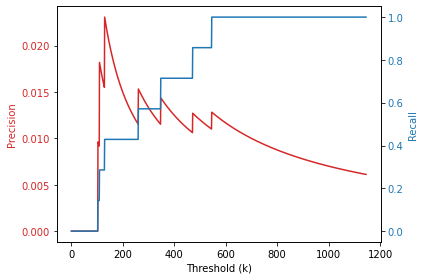

Graph for document 1


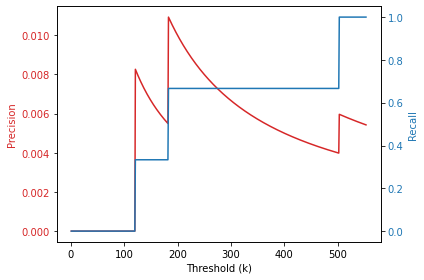

Graph for document 2


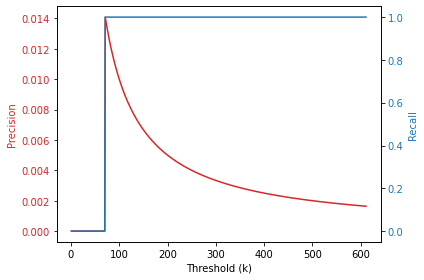

Graph for document 3


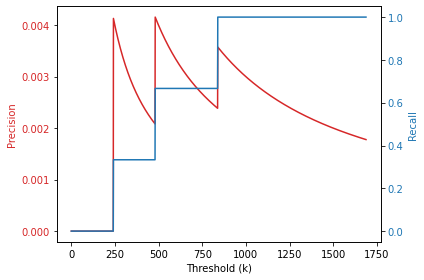

Graph for document 4


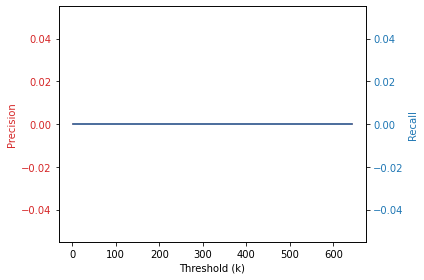

Graph for document 5


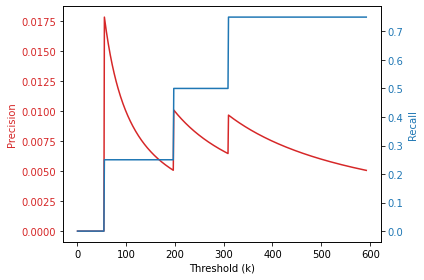

Graph for document 6


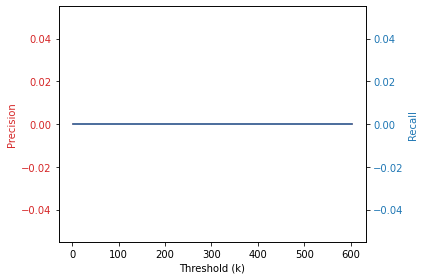

Graph for document 7


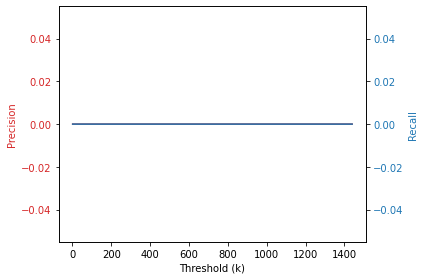

Graph for document 8


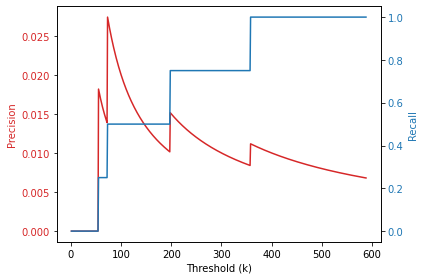

Graph for document 9


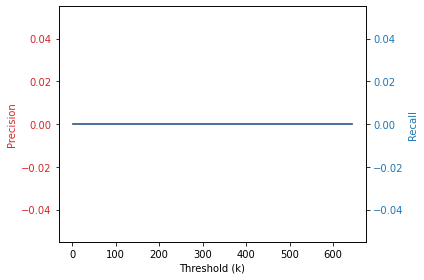

Graph for document 10


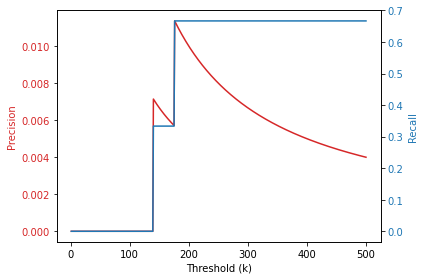

Graph for document 11


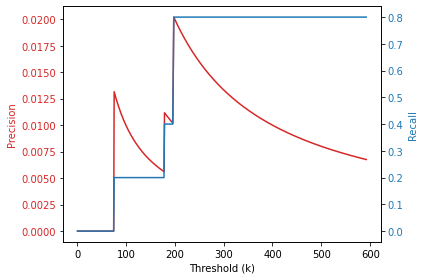

Graph for document 12


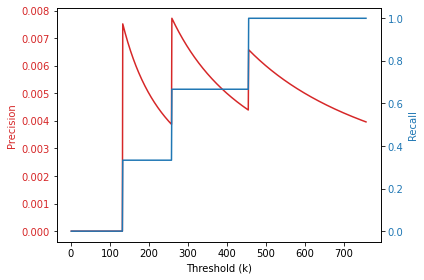

Graph for document 13


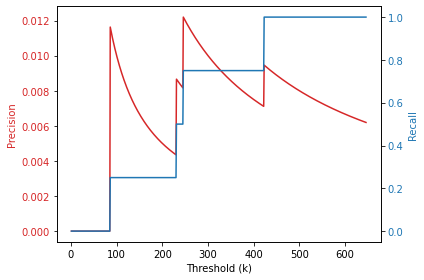

Graph for document 14


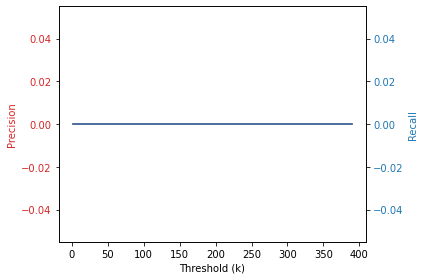

Graph for document 15


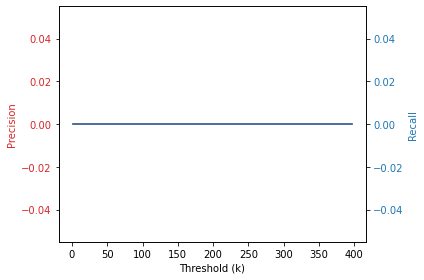

Graph for document 16


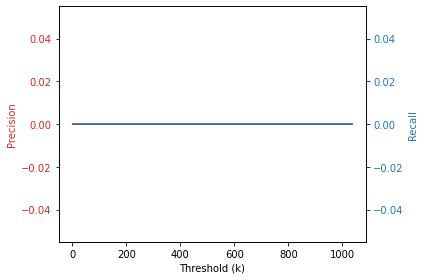

Graph for document 17


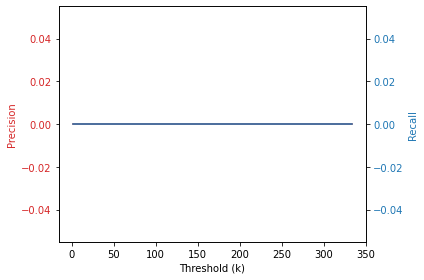

Graph for document 18


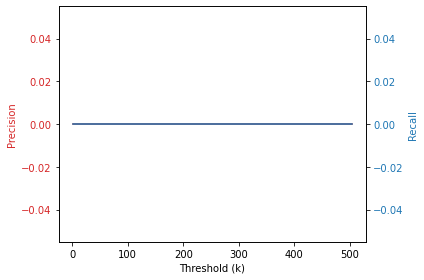

In [164]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values_new)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values_new[i])+1))]
        data1 = precison_values_new[i]
        data2 = recall_values_new[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

F1 Score Graph for Documents 0


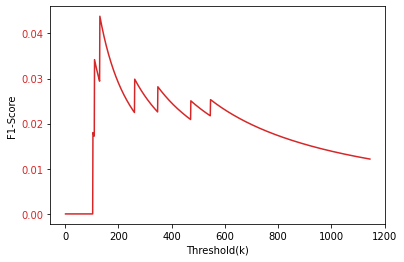

F1 Score Graph for Documents 1


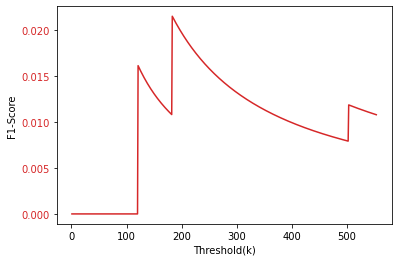

F1 Score Graph for Documents 2


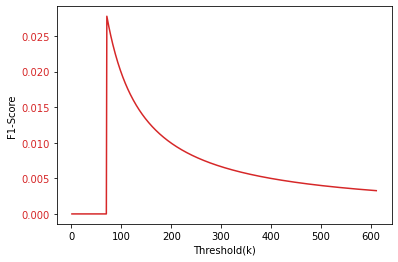

F1 Score Graph for Documents 3


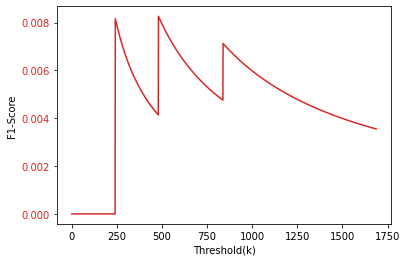

F1 Score Graph for Documents 4


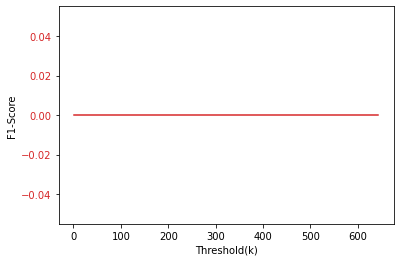

F1 Score Graph for Documents 5


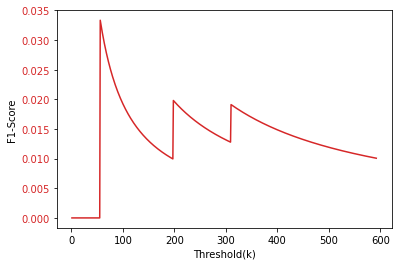

F1 Score Graph for Documents 6


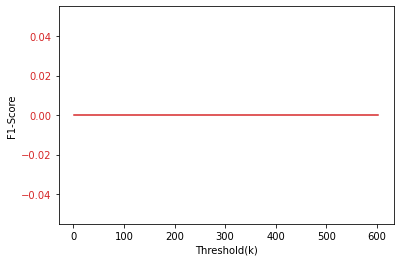

F1 Score Graph for Documents 7


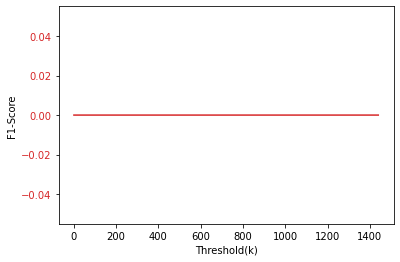

F1 Score Graph for Documents 8


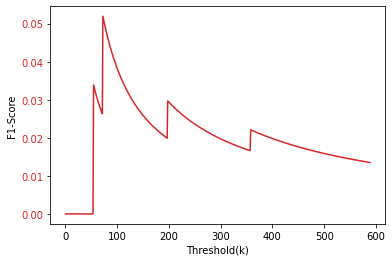

F1 Score Graph for Documents 9


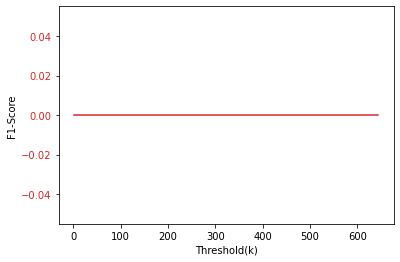

F1 Score Graph for Documents 10


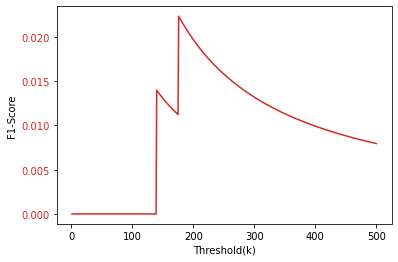

F1 Score Graph for Documents 11


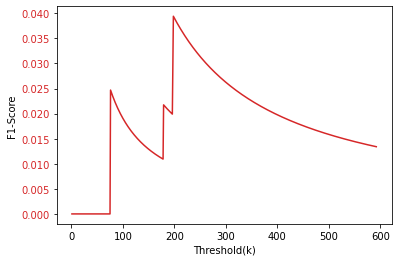

F1 Score Graph for Documents 12


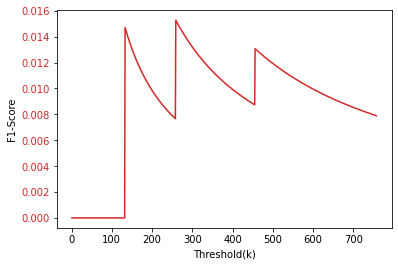

F1 Score Graph for Documents 13


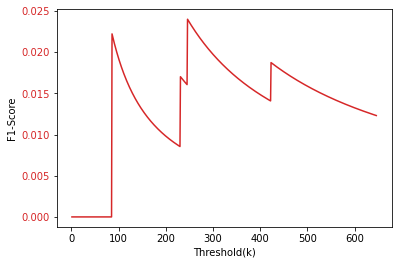

F1 Score Graph for Documents 14


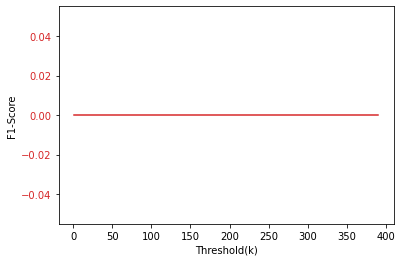

F1 Score Graph for Documents 15


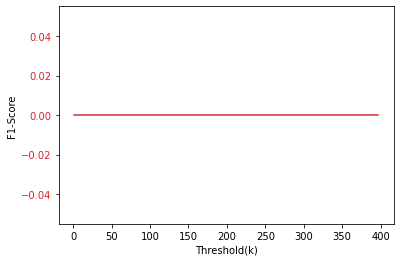

F1 Score Graph for Documents 16


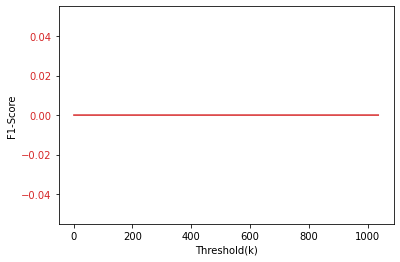

F1 Score Graph for Documents 17


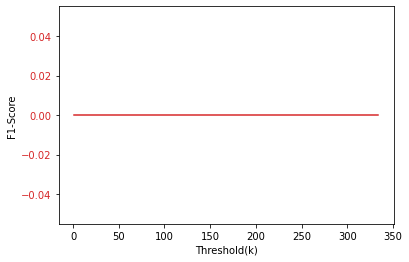

F1 Score Graph for Documents 18


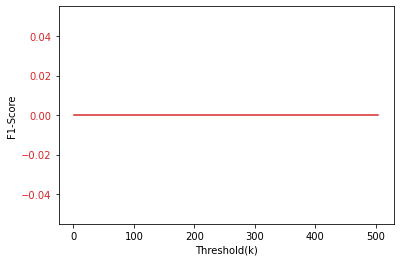

In [165]:
import matplotlib.pyplot as plt

for i in range(len(F1_values_new)):
    print("F1 Score Graph for Documents " + str(i))
    t = [x for x in range(1,(len(F1_values_new[i])+1))]
    data = F1_values_new[i]
#     fig, ax1 = plt.subplots()

    color = 'tab:red'
    plt.xlabel("Threshold(k)")
    plt.ylabel("F1-Score")
    plt.plot(t, data, color=color)
    plt.tick_params(axis='y', labelcolor=color)
    plt.show()

In [166]:
F1_values_new[13].index(max(F1_values_new[13]))

245

In [167]:
test_new = [elem for elem in result[10]]
len(test_new)

500

In [168]:
test_new

['teamarbeit',
 'zusammenarbeit',
 'zusammenzuarbeiten',
 'ausländerbeauftragter',
 'ausländerbehörde',
 'jobcenter',
 'berufsperspektiven',
 'berufsperspektive',
 'prüfungen',
 'lebensunterhalt',
 'lebensunterhalts',
 'berufsvorstellung',
 'berufsvorstellungen',
 'berufstätigkeit',
 'berufsausbildung',
 'wissenschaftliche',
 'privathaushalt',
 'prüfungsbedingungen',
 'lerngruppe',
 'bildungsfinanzierung',
 'studienfinanzierung',
 'wissenschaftssprache',
 'freunde',
 'prüfung',
 'woche',
 'familie',
 'mitstudierenden',
 'praxis',
 'prüfungsanforderung',
 'anwendungsbeispiele',
 'kontakt',
 'studiengang',
 'lernaktivitäten',
 'vorlesung',
 'finanzierung',
 'methode',
 'aufenthaltsstatus',
 'studienberatung',
 'einführungsveranstaltungen',
 'lektüren',
 'lernen',
 'veranstaltungen',
 'asylant',
 'ausbildungsplatz',
 'deutschland',
 'kontakte',
 'leistungsdruck',
 'gemeinsam',
 'verhalten',
 'bachelor',
 'veranstaltung',
 'flüchtlingsstatus',
 'stipendium',
 'hochschule',
 'studentin',
 '

In [169]:
keywords_within_text[10]

['geflüchtete', 'studienkolleg', 'studienvorbereitung']

In [170]:
list(set(test_new).intersection(keywords_within_text[10]))

['studienkolleg', 'studienvorbereitung']

In [171]:
# test_new.index('promovierende')

In [172]:
recall_indices_best = []
for i in range(len(recall_values_new)):
    recall_indices_best.append(recall_values_new[i].index(max(recall_values_new[i])))

In [173]:
recall_indices_best[11]

197

In [174]:
precision_indices_best = []
for i in range(len(precison_values_new)):
    precision_indices_best.append(precison_values_new[i].index(max(precison_values_new[i])))

In [175]:
precision_indices_best[11]

197

In [176]:
F1_indices_best = []
for i in range(len(F1_values_new)):
    F1_indices_best.append(F1_values_new[i].index(max(F1_values_new[i])))

In [177]:
F1_indices_best[11]

197

In [178]:
# 13, 8, 5, 11, 10, 12

In [179]:
# recall_indices_best 

In [180]:
recall_indices_element_best = []

for i in range(len(recall_indices_best)):
    Recall_values = recall_values_new[i]
    recall_indices_element_best.append(Recall_values[recall_indices_best[i]])

In [181]:
recall_indices_element_best

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.75,
 0.0,
 0.0,
 1.0,
 0.0,
 0.6666666666666666,
 0.8,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [182]:
recall_indices_element_best = []

for i in range(len(recall_indices_best)):
    Recall_values = recall_values_new[i]
    recall_indices_element_best.append(Recall_values[recall_indices_best[i]])